In [145]:
import netCDF4 as nc
from netCDF4 import num2date,date2index
import datetime
import csv
import numpy as np
import pandas as pd
import xarray as xr
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.preprocessing import normalize
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from tensorflow.keras.initializers import glorot_uniform
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [146]:
vwind = nc.Dataset('GPH200.nc')
slp = nc.Dataset('AirT.nc')

In [147]:
vwind

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    CDI: Climate Data Interface version 1.9.10 (https://mpimet.mpg.de/cdi)
    Conventions: COARDS
    description:  Data from NCEP initialized reanalysis (4x/day).  These are interpolated to pressure surfaces from model (sigma) surfaces.
    platform: Model
    NCO: 20121012
    title: monthly mean hgt from the NCEP Reanalysis
    dataset_title: NCEP-NCAR Reanalysis 1
    References: http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis.derived.html
    CDO: Climate Data Operators version 1.9.10 (https://mpimet.mpg.de/cdo)
    history: 12-Dec-2023 06:00:45 Subset NOAA/PSL  
    dimensions(sizes): time(708), lon(144), lat(73), level(1)
    variables(dimensions): float64 time(time), float32 lon(lon), float32 lat(lat), float32 level(level), float32 hgt(time, level, lat, lon)
    groups: 

In [148]:
slp

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    CDI: Climate Data Interface version 1.9.10 (https://mpimet.mpg.de/cdi)
    Conventions: COARDS
    description: Data is from NMC initialized reanalysis
(4x/day).  It consists of T62 variables interpolated to
pressure surfaces from model (sigma) surfaces.
    platform: Model
    NCO: 20121012
    title: monthly mean air.2m from the NCEP Reanalysis
    dataset_title: NCEP-NCAR Reanalysis 1
    References: http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis.derived.html
    CDO: Climate Data Operators version 1.9.10 (https://mpimet.mpg.de/cdo)
    history: 16-Jun-2023 03:11:00 Subset NOAA/PSL  
    dimensions(sizes): time(708), lon(192), lat(94)
    variables(dimensions): float64 time(time), float32 lon(lon), float32 lat(lat), float32 air(time, lat, lon)
    groups: 

In [149]:
v_wind = vwind.variables['hgt']
print(vwind)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    CDI: Climate Data Interface version 1.9.10 (https://mpimet.mpg.de/cdi)
    Conventions: COARDS
    description:  Data from NCEP initialized reanalysis (4x/day).  These are interpolated to pressure surfaces from model (sigma) surfaces.
    platform: Model
    NCO: 20121012
    title: monthly mean hgt from the NCEP Reanalysis
    dataset_title: NCEP-NCAR Reanalysis 1
    References: http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis.derived.html
    CDO: Climate Data Operators version 1.9.10 (https://mpimet.mpg.de/cdo)
    history: 12-Dec-2023 06:00:45 Subset NOAA/PSL  
    dimensions(sizes): time(708), lon(144), lat(73), level(1)
    variables(dimensions): float64 time(time), float32 lon(lon), float32 lat(lat), float32 level(level), float32 hgt(time, level, lat, lon)
    groups: 


In [150]:
slp_ = slp.variables['air']
print(slp)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    CDI: Climate Data Interface version 1.9.10 (https://mpimet.mpg.de/cdi)
    Conventions: COARDS
    description: Data is from NMC initialized reanalysis
(4x/day).  It consists of T62 variables interpolated to
pressure surfaces from model (sigma) surfaces.
    platform: Model
    NCO: 20121012
    title: monthly mean air.2m from the NCEP Reanalysis
    dataset_title: NCEP-NCAR Reanalysis 1
    References: http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis.derived.html
    CDO: Climate Data Operators version 1.9.10 (https://mpimet.mpg.de/cdo)
    history: 16-Jun-2023 03:11:00 Subset NOAA/PSL  
    dimensions(sizes): time(708), lon(192), lat(94)
    variables(dimensions): float64 time(time), float32 lon(lon), float32 lat(lat), float32 air(time, lat, lon)
    groups: 


In [151]:
latitude = vwind.variables['lat']
print(latitude)

<class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    standard_name: latitude
    long_name: Latitude
    units: degrees_north
    axis: Y
    actual_range: [ 90. -90.]
unlimited dimensions: 
current shape = (73,)
filling off


In [152]:
latitude[:].shape

(73,)

In [153]:
latitude[:]

masked_array(data=[ 90. ,  87.5,  85. ,  82.5,  80. ,  77.5,  75. ,  72.5,
                    70. ,  67.5,  65. ,  62.5,  60. ,  57.5,  55. ,  52.5,
                    50. ,  47.5,  45. ,  42.5,  40. ,  37.5,  35. ,  32.5,
                    30. ,  27.5,  25. ,  22.5,  20. ,  17.5,  15. ,  12.5,
                    10. ,   7.5,   5. ,   2.5,   0. ,  -2.5,  -5. ,  -7.5,
                   -10. , -12.5, -15. , -17.5, -20. , -22.5, -25. , -27.5,
                   -30. , -32.5, -35. , -37.5, -40. , -42.5, -45. , -47.5,
                   -50. , -52.5, -55. , -57.5, -60. , -62.5, -65. , -67.5,
                   -70. , -72.5, -75. , -77.5, -80. , -82.5, -85. , -87.5,
                   -90. ],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [154]:
latitude_slp = slp.variables['lat']
print(latitude_slp)

<class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    standard_name: latitude
    long_name: Latitude
    units: degrees_north
    axis: Y
    actual_range: [ 88.542 -88.542]
unlimited dimensions: 
current shape = (94,)
filling off


In [155]:
latitude_slp[:].shape

(94,)

In [156]:
latitude_slp[:]

masked_array(data=[ 88.542   ,  86.6531  ,  84.7532  ,  82.8508  ,
                    80.9473  ,  79.0435  ,  77.1394  ,  75.2351  ,
                    73.3307  ,  71.4262  ,  69.5217  ,  67.6171  ,
                    65.7125  ,  63.8079  ,  61.9033  ,  59.9986  ,
                    58.0939  ,  56.1893  ,  54.2846  ,  52.3799  ,
                    50.4752  ,  48.5705  ,  46.6658  ,  44.7611  ,
                    42.8564  ,  40.9517  ,  39.047   ,  37.1422  ,
                    35.2375  ,  33.3328  ,  31.4281  ,  29.5234  ,
                    27.6186  ,  25.7139  ,  23.8092  ,  21.9044  ,
                    19.9997  ,  18.095   ,  16.1902  ,  14.2855  ,
                    12.3808  ,  10.47604 ,   8.57131 ,   6.66657 ,
                     4.76184 ,   2.8571  ,   0.952368,  -0.952368,
                    -2.8571  ,  -4.76184 ,  -6.66657 ,  -8.57131 ,
                   -10.47604 , -12.3808  , -14.2855  , -16.1902  ,
                   -18.095   , -19.9997  , -21.9044  , -23.809

In [157]:
longitude = vwind.variables['lon']
print(longitude)

<class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    standard_name: longitude
    long_name: Longitude
    units: degrees_east
    axis: X
    actual_range: [  0.  357.5]
unlimited dimensions: 
current shape = (144,)
filling off


In [158]:
longitude[:]

masked_array(data=[  0. ,   2.5,   5. ,   7.5,  10. ,  12.5,  15. ,  17.5,
                    20. ,  22.5,  25. ,  27.5,  30. ,  32.5,  35. ,  37.5,
                    40. ,  42.5,  45. ,  47.5,  50. ,  52.5,  55. ,  57.5,
                    60. ,  62.5,  65. ,  67.5,  70. ,  72.5,  75. ,  77.5,
                    80. ,  82.5,  85. ,  87.5,  90. ,  92.5,  95. ,  97.5,
                   100. , 102.5, 105. , 107.5, 110. , 112.5, 115. , 117.5,
                   120. , 122.5, 125. , 127.5, 130. , 132.5, 135. , 137.5,
                   140. , 142.5, 145. , 147.5, 150. , 152.5, 155. , 157.5,
                   160. , 162.5, 165. , 167.5, 170. , 172.5, 175. , 177.5,
                   180. , 182.5, 185. , 187.5, 190. , 192.5, 195. , 197.5,
                   200. , 202.5, 205. , 207.5, 210. , 212.5, 215. , 217.5,
                   220. , 222.5, 225. , 227.5, 230. , 232.5, 235. , 237.5,
                   240. , 242.5, 245. , 247.5, 250. , 252.5, 255. , 257.5,
                   260. ,

In [159]:
longitude_slp = slp.variables['lon']
print(longitude_slp)

<class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    standard_name: longitude
    long_name: Longitude
    units: degrees_east
    axis: X
    actual_range: [  0.    358.125]
unlimited dimensions: 
current shape = (192,)
filling off


In [160]:
longitude_slp[:]

masked_array(data=[  0.   ,   1.875,   3.75 ,   5.625,   7.5  ,   9.375,
                    11.25 ,  13.125,  15.   ,  16.875,  18.75 ,  20.625,
                    22.5  ,  24.375,  26.25 ,  28.125,  30.   ,  31.875,
                    33.75 ,  35.625,  37.5  ,  39.375,  41.25 ,  43.125,
                    45.   ,  46.875,  48.75 ,  50.625,  52.5  ,  54.375,
                    56.25 ,  58.125,  60.   ,  61.875,  63.75 ,  65.625,
                    67.5  ,  69.375,  71.25 ,  73.125,  75.   ,  76.875,
                    78.75 ,  80.625,  82.5  ,  84.375,  86.25 ,  88.125,
                    90.   ,  91.875,  93.75 ,  95.625,  97.5  ,  99.375,
                   101.25 , 103.125, 105.   , 106.875, 108.75 , 110.625,
                   112.5  , 114.375, 116.25 , 118.125, 120.   , 121.875,
                   123.75 , 125.625, 127.5  , 129.375, 131.25 , 133.125,
                   135.   , 136.875, 138.75 , 140.625, 142.5  , 144.375,
                   146.25 , 148.125, 150.   , 151.8

In [161]:
time = vwind.variables['time']
time_ = time[:]
time_units = time.units
time_calendar = time.calendar
time_dates = num2date(time_, units=time_units, calendar=time_calendar)
start_date = datetime.datetime(1958, 1, 1)
start_index = date2index(start_date, time, select='nearest')
air_subset = vwind['hgt'][start_index:, :, :]

In [162]:
slp_subset = slp['air'][start_index:, :, :]

In [163]:
data_slp = np.array(slp_subset)

In [164]:
data_ = np.array(air_subset)
data_[data_ == -9.96921e+36] = 0

In [165]:
for date in time_dates:
    print(date)

1958-01-01 00:00:00
1958-02-01 00:00:00
1958-03-01 00:00:00
1958-04-01 00:00:00
1958-05-01 00:00:00
1958-06-01 00:00:00
1958-07-01 00:00:00
1958-08-01 00:00:00
1958-09-01 00:00:00
1958-10-01 00:00:00
1958-11-01 00:00:00
1958-12-01 00:00:00
1959-01-01 00:00:00
1959-02-01 00:00:00
1959-03-01 00:00:00
1959-04-01 00:00:00
1959-05-01 00:00:00
1959-06-01 00:00:00
1959-07-01 00:00:00
1959-08-01 00:00:00
1959-09-01 00:00:00
1959-10-01 00:00:00
1959-11-01 00:00:00
1959-12-01 00:00:00
1960-01-01 00:00:00
1960-02-01 00:00:00
1960-03-01 00:00:00
1960-04-01 00:00:00
1960-05-01 00:00:00
1960-06-01 00:00:00
1960-07-01 00:00:00
1960-08-01 00:00:00
1960-09-01 00:00:00
1960-10-01 00:00:00
1960-11-01 00:00:00
1960-12-01 00:00:00
1961-01-01 00:00:00
1961-02-01 00:00:00
1961-03-01 00:00:00
1961-04-01 00:00:00
1961-05-01 00:00:00
1961-06-01 00:00:00
1961-07-01 00:00:00
1961-08-01 00:00:00
1961-09-01 00:00:00
1961-10-01 00:00:00
1961-11-01 00:00:00
1961-12-01 00:00:00
1962-01-01 00:00:00
1962-02-01 00:00:00


In [166]:
data_

array([[[[10959.064 , 10959.064 , 10959.064 , ..., 10959.064 ,
          10959.064 , 10959.064 ],
         [10961.483 , 10961.258 , 10960.807 , ..., 10962.387 ,
          10962.    , 10961.71  ],
         [10968.032 , 10967.807 , 10967.451 , ..., 10968.774 ,
          10968.613 , 10968.29  ],
         ...,
         [11284.129 , 11285.903 , 11287.613 , ..., 11278.419 ,
          11280.451 , 11282.258 ],
         [11276.451 , 11277.097 , 11277.71  , ..., 11274.678 ,
          11275.258 , 11275.903 ],
         [11269.29  , 11269.29  , 11269.29  , ..., 11269.29  ,
          11269.29  , 11269.29  ]]],


       [[[11082.179 , 11082.179 , 11082.179 , ..., 11082.179 ,
          11082.179 , 11082.179 ],
         [11072.857 , 11072.321 , 11071.429 , ..., 11075.25  ,
          11074.357 , 11073.571 ],
         [11072.893 , 11071.643 , 11070.214 , ..., 11076.821 ,
          11075.464 , 11074.214 ],
         ...,
         [11154.643 , 11152.071 , 11149.607 , ..., 11163.25  ,
          11160.214 , 1

In [167]:
data_slp

array([[[242.67839, 242.67741, 242.65549, ..., 242.74127, 242.71709,
         242.69644],
        [243.68414, 243.68127, 243.67902, ..., 243.6503 , 243.6819 ,
         243.69708],
        [245.25447, 245.32898, 245.41322, ..., 245.10028, 245.16899,
         245.2345 ],
        ...,
        [257.8329 , 258.05096, 258.26257, ..., 257.24097, 257.42807,
         257.6313 ],
        [258.0322 , 258.11777, 258.2148 , ..., 257.84323, 257.89645,
         257.9648 ],
        [257.93512, 257.9254 , 257.91937, ..., 257.96323, 257.95227,
         257.9429 ]],

       [[237.96216, 237.95569, 237.9528 , ..., 237.955  , 237.94217,
         237.96141],
        [237.40498, 237.54497, 237.67213, ..., 236.95248, 237.09282,
         237.2539 ],
        [238.65605, 238.98608, 239.29248, ..., 237.69926, 238.01817,
         238.34322],
        ...,
        [234.59033, 234.6957 , 234.79604, ..., 234.65785, 234.5586 ,
         234.54285],
        [235.72789, 235.5986 , 235.48856, ..., 236.20923, 236.02783,
   

In [168]:
np.max(data_)

12631.1045

In [169]:
np.min(data_)

10306.097

In [170]:
np.max(data_slp)

313.74673

In [171]:
np.min(data_slp)

187.4545

In [172]:
data_.shape

(708, 1, 73, 144)

In [173]:
data_slp.shape

(708, 94, 192)

In [174]:
len(data_)

708

In [175]:
num_years = data_.shape[0] // 12
num_months = data_.shape[0] // num_years

In [176]:
num_years

59

In [177]:
num_months

12

In [178]:
data_reshaped = np.reshape(data_, (len(data_) // 12, 12, data_.shape[2],data_.shape[3]))

In [179]:
data_reshaped_slp = np.reshape(data_slp, (len(data_) // 12, 12, data_slp.shape[1],data_slp.shape[2]))

In [180]:
lat_indices = []
for start_value in np.arange(90, -90, -10):  # Changed step to -10 for descending order
    end_value = start_value - 10  # Adjusted end_value calculation

    # Get indices within the range
    range_indices = np.where((latitude <= start_value) & (latitude > end_value))[0]

    if len(range_indices) > 0:  # Check if any values are within the range
        # Get indices of largest and smallest values
        min_index = range_indices[np.argmax(latitude[range_indices])]
        max_index = range_indices[np.argmin(latitude[range_indices])]
        
        lat_indices.append(min_index)
        lat_indices.append(max_index)

        print(f"Range {start_value} to {end_value}: Min index = {min_index}, Max index = {max_index}, Min = {latitude[min_index]}, Max = {latitude[max_index]}")
    else:
        print(f"No values found in range {start_value} to {end_value}")

Range 90 to 80: Min index = 0, Max index = 3, Min = 90.0, Max = 82.5
Range 80 to 70: Min index = 4, Max index = 7, Min = 80.0, Max = 72.5
Range 70 to 60: Min index = 8, Max index = 11, Min = 70.0, Max = 62.5
Range 60 to 50: Min index = 12, Max index = 15, Min = 60.0, Max = 52.5
Range 50 to 40: Min index = 16, Max index = 19, Min = 50.0, Max = 42.5
Range 40 to 30: Min index = 20, Max index = 23, Min = 40.0, Max = 32.5
Range 30 to 20: Min index = 24, Max index = 27, Min = 30.0, Max = 22.5
Range 20 to 10: Min index = 28, Max index = 31, Min = 20.0, Max = 12.5
Range 10 to 0: Min index = 32, Max index = 35, Min = 10.0, Max = 2.5
Range 0 to -10: Min index = 36, Max index = 39, Min = 0.0, Max = -7.5
Range -10 to -20: Min index = 40, Max index = 43, Min = -10.0, Max = -17.5
Range -20 to -30: Min index = 44, Max index = 47, Min = -20.0, Max = -27.5
Range -30 to -40: Min index = 48, Max index = 51, Min = -30.0, Max = -37.5
Range -40 to -50: Min index = 52, Max index = 55, Min = -40.0, Max = -47.

In [38]:
lat_indices_slp = []
for start_value in np.arange(90, -90, -10):  # Changed step to -10 for descending order
    end_value = start_value - 10  # Adjusted end_value calculation

    # Get indices within the range
    range_indices = np.where((latitude_slp <= start_value) & (latitude_slp > end_value))[0]

    if len(range_indices) > 0:  # Check if any values are within the range
        # Get indices of largest and smallest values
        min_index = range_indices[np.argmax(latitude_slp[range_indices])]
        max_index = range_indices[np.argmin(latitude_slp[range_indices])]
        
        lat_indices_slp.append(min_index)
        lat_indices_slp.append(max_index)

        print(f"Range {start_value} to {end_value}: Min index = {min_index}, Max index = {max_index}, Min = {latitude_slp[min_index]}, Max = {latitude_slp[max_index]}")
    else:
        print(f"No values found in range {start_value} to {end_value}")

Range 90 to 80: Min index = 0, Max index = 4, Min = 88.54199981689453, Max = 80.94730377197266
Range 80 to 70: Min index = 5, Max index = 9, Min = 79.04350280761719, Max = 71.42620086669922
Range 70 to 60: Min index = 10, Max index = 14, Min = 69.52169799804688, Max = 61.90330123901367
Range 60 to 50: Min index = 15, Max index = 20, Min = 59.998600006103516, Max = 50.47520065307617
Range 50 to 40: Min index = 21, Max index = 25, Min = 48.570499420166016, Max = 40.951698303222656
Range 40 to 30: Min index = 26, Max index = 30, Min = 39.047000885009766, Max = 31.4281005859375
Range 30 to 20: Min index = 31, Max index = 35, Min = 29.523399353027344, Max = 21.904399871826172
Range 20 to 10: Min index = 36, Max index = 41, Min = 19.99970054626465, Max = 10.47603988647461
Range 10 to 0: Min index = 42, Max index = 46, Min = 8.571310043334961, Max = 0.9523680210113525
Range 0 to -10: Min index = 47, Max index = 51, Min = -0.9523680210113525, Max = -8.571310043334961
Range -10 to -20: Min inde

In [181]:
lat_indices

[0,
 3,
 4,
 7,
 8,
 11,
 12,
 15,
 16,
 19,
 20,
 23,
 24,
 27,
 28,
 31,
 32,
 35,
 36,
 39,
 40,
 43,
 44,
 47,
 48,
 51,
 52,
 55,
 56,
 59,
 60,
 63,
 64,
 67,
 68,
 71]

In [182]:
lat_indices_slp

[0,
 4,
 5,
 9,
 10,
 14,
 15,
 20,
 21,
 25,
 26,
 30,
 31,
 35,
 36,
 41,
 42,
 46,
 47,
 51,
 52,
 57,
 58,
 62,
 63,
 67,
 68,
 72,
 73,
 78,
 79,
 83,
 84,
 88,
 89,
 93]

In [183]:
len(lat_indices)

36

In [184]:
len(lat_indices_slp)

36

In [185]:
lon_indices = []
for start_value in np.arange(0, 360, 20):  # Changed step to -10 for descending order
    end_value = start_value + 20  # Adjusted end_value calculation

    # Get indices within the range
    range_indices = np.where((longitude >= start_value) & (longitude < end_value))[0]

    if len(range_indices) > 0:  # Check if any values are within the range
        # Get indices of largest and smallest values
        min_index = range_indices[np.argmin(longitude[range_indices])]
        max_index = range_indices[np.argmax(longitude[range_indices])]
        
        lon_indices.append(min_index)
        lon_indices.append(max_index)

        print(f"Range {start_value} to {end_value}: Min index = {min_index}, Max index = {max_index}, Min = {longitude[min_index]}, Max = {longitude[max_index]}")
    else:
        print(f"No values found in range {start_value} to {end_value}")

Range 0 to 20: Min index = 0, Max index = 7, Min = 0.0, Max = 17.5
Range 20 to 40: Min index = 8, Max index = 15, Min = 20.0, Max = 37.5
Range 40 to 60: Min index = 16, Max index = 23, Min = 40.0, Max = 57.5
Range 60 to 80: Min index = 24, Max index = 31, Min = 60.0, Max = 77.5
Range 80 to 100: Min index = 32, Max index = 39, Min = 80.0, Max = 97.5
Range 100 to 120: Min index = 40, Max index = 47, Min = 100.0, Max = 117.5
Range 120 to 140: Min index = 48, Max index = 55, Min = 120.0, Max = 137.5
Range 140 to 160: Min index = 56, Max index = 63, Min = 140.0, Max = 157.5
Range 160 to 180: Min index = 64, Max index = 71, Min = 160.0, Max = 177.5
Range 180 to 200: Min index = 72, Max index = 79, Min = 180.0, Max = 197.5
Range 200 to 220: Min index = 80, Max index = 87, Min = 200.0, Max = 217.5
Range 220 to 240: Min index = 88, Max index = 95, Min = 220.0, Max = 237.5
Range 240 to 260: Min index = 96, Max index = 103, Min = 240.0, Max = 257.5
Range 260 to 280: Min index = 104, Max index = 1

In [186]:
lon_indices_slp = []
for start_value in np.arange(0, 360, 20):  # Changed step to -10 for descending order
    end_value = start_value + 20  # Adjusted end_value calculation

    # Get indices within the range
    range_indices = np.where((longitude_slp >= start_value) & (longitude_slp < end_value))[0]

    if len(range_indices) > 0:  # Check if any values are within the range
        # Get indices of largest and smallest values
        min_index = range_indices[np.argmin(longitude_slp[range_indices])]
        max_index = range_indices[np.argmax(longitude_slp[range_indices])]
        
        lon_indices_slp.append(min_index)
        lon_indices_slp.append(max_index)

        print(f"Range {start_value} to {end_value}: Min index = {min_index}, Max index = {max_index}, Min = {longitude_slp[min_index]}, Max = {longitude_slp[max_index]}")
    else:
        print(f"No values found in range {start_value} to {end_value}")

Range 0 to 20: Min index = 0, Max index = 10, Min = 0.0, Max = 18.75
Range 20 to 40: Min index = 11, Max index = 21, Min = 20.625, Max = 39.375
Range 40 to 60: Min index = 22, Max index = 31, Min = 41.25, Max = 58.125
Range 60 to 80: Min index = 32, Max index = 42, Min = 60.0, Max = 78.75
Range 80 to 100: Min index = 43, Max index = 53, Min = 80.625, Max = 99.375
Range 100 to 120: Min index = 54, Max index = 63, Min = 101.25, Max = 118.125
Range 120 to 140: Min index = 64, Max index = 74, Min = 120.0, Max = 138.75
Range 140 to 160: Min index = 75, Max index = 85, Min = 140.625, Max = 159.375
Range 160 to 180: Min index = 86, Max index = 95, Min = 161.25, Max = 178.125
Range 180 to 200: Min index = 96, Max index = 106, Min = 180.0, Max = 198.75
Range 200 to 220: Min index = 107, Max index = 117, Min = 200.625, Max = 219.375
Range 220 to 240: Min index = 118, Max index = 127, Min = 221.25, Max = 238.125
Range 240 to 260: Min index = 128, Max index = 138, Min = 240.0, Max = 258.75
Range 2

In [187]:
lon_indices

[0,
 7,
 8,
 15,
 16,
 23,
 24,
 31,
 32,
 39,
 40,
 47,
 48,
 55,
 56,
 63,
 64,
 71,
 72,
 79,
 80,
 87,
 88,
 95,
 96,
 103,
 104,
 111,
 112,
 119,
 120,
 127,
 128,
 135,
 136,
 143]

In [188]:
lon_indices_slp

[0,
 10,
 11,
 21,
 22,
 31,
 32,
 42,
 43,
 53,
 54,
 63,
 64,
 74,
 75,
 85,
 86,
 95,
 96,
 106,
 107,
 117,
 118,
 127,
 128,
 138,
 139,
 149,
 150,
 159,
 160,
 170,
 171,
 181,
 182,
 191]

In [189]:
len(lon_indices)

36

In [190]:
len(lon_indices_slp)

36

In [191]:
for lat_idx in range(0, len(lat_indices), 2):
    lat_range_start = lat_indices[lat_idx]
    lat_range_end = lat_indices[lat_idx + 1]
    print(lat_range_start,lat_range_end)

0 3
4 7
8 11
12 15
16 19
20 23
24 27
28 31
32 35
36 39
40 43
44 47
48 51
52 55
56 59
60 63
64 67
68 71


In [192]:
for lon_idx in range(0, len(lon_indices),2):
    lon_range_start = lon_indices[lon_idx]
    lon_range_end = lon_indices[lon_idx + 1]
    print(lon_range_start,lon_range_end)

0 7
8 15
16 23
24 31
32 39
40 47
48 55
56 63
64 71
72 79
80 87
88 95
96 103
104 111
112 119
120 127
128 135
136 143


In [193]:
def coarse_gridding(data, lat_indices, lon_indices):
    coarsed_data = np.zeros((data.shape[0], data.shape[1], len(lat_indices) // 2, len(lon_indices) // 2))
    for lat_idx in range(0, len(lat_indices), 2):
        lat_range_start = lat_indices[lat_idx]
        lat_range_end = lat_indices[lat_idx + 1]
        for lon_idx in range(0, len(lon_indices), 2):
            lon_range_start = lon_indices[lon_idx]
            lon_range_end = lon_indices[lon_idx + 1]
            subset = data[:, :, lat_range_start:lat_range_end, lon_range_start:lon_range_end]
            averaged_value = np.mean(subset, axis=(2, 3))
            coarsed_data[:, :, lat_idx // 2, lon_idx // 2] = averaged_value
    return coarsed_data


In [194]:
 avg = coarse_gridding(data_reshaped,lat_indices,lon_indices)

In [195]:
 avg_slp = coarse_gridding(data_reshaped_slp,lat_indices_slp,lon_indices_slp)

In [196]:
avg.shape

(59, 12, 18, 18)

In [197]:
avg_slp.shape

(59, 12, 18, 18)

In [198]:
avg[1,1,:,1]

array([10758.98925781, 10974.05175781, 11313.20703125, 11503.52246094,
       11572.13867188, 11670.80664062, 12044.12890625, 12370.01367188,
       12416.33789062, 12418.40332031, 12449.87695312, 12449.49511719,
       12293.98632812, 11942.07617188, 11516.12304688, 11281.51660156,
       11217.88574219, 11132.88867188])

In [199]:
avg_slp[1,1,:,1]

array([237.91757202, 260.10202026, 268.48214722, 268.39157104,
       271.36395264, 279.28863525, 283.61322021, 293.53561401,
       296.75665283, 294.19985962, 294.51821899, 296.90673828,
       294.46496582, 284.94174194, 276.02813721, 273.51663208,
       245.37313843, 237.2964325 ])

In [200]:
final= np.reshape(avg, (len(data_) // 12, 12, 324))

In [201]:
final_slp= np.reshape(avg_slp, (len(data_slp) // 12, 12, 324))

In [202]:
final.shape

(59, 12, 324)

In [203]:
final_slp.shape

(59, 12, 324)

In [204]:
np.max(final)

12618.392578125

In [205]:
np.max(final_slp)

308.5638732910156

In [206]:
np.min(final)

10314.056640625

In [207]:
np.min(final_slp)

200.49240112304688

In [208]:
ff= final.reshape(324,708)
ff.shape

(324, 708)

In [209]:
ff_slp= final_slp.reshape(324,708)
ff_slp.shape

(324, 708)

In [210]:
def calculate_monthly_anomaliess(data):
    """Calculate monthly anomalies and mean for a given dataset.

    Args:
        data: A multidimensional array with dimensions (years, months, latlon).

    Returns:
        monthly_anomalies: An array with monthly anomalies of the same shape as the input data.
        monthly_mean: A multidimensional array with dimensions (months, latlon) representing the mean for each month.
    """


    anomalies = np.zeros((59,12,324))
    for i in range(data.shape[2]):
        for j in range(data.shape[1]):
            month = data[:, j, i]
            monthly_mean = np.mean(month)
            anomalies[:, j, i] = month - monthly_mean
    return anomalies

def min_max_normalize(data):
    normalized_data = np.zeros((data.shape[0],data.shape[1],data.shape[2]))
    for i in range(data.shape[2]):
        for j in range(data.shape[1]):
            month = data[:, j, i]

            # Calculate min and max values for each month
            min_value = np.min(month)
            max_value = np.max(month)

            # Normalize each month value
            normalized_month = (month - min_value) / (max_value - min_value)

            # Store normalized month data
            normalized_data[:, j, i] = normalized_month


    return normalized_data




In [211]:
anomalies = calculate_monthly_anomaliess(final)
anomalies

array([[[  43.6332594 ,   42.28878112,   40.52820445, ...,
          -10.85176112,    1.2634898 ,   22.7547504 ],
        [ 147.83616923,  143.30849444,  139.85316803, ...,
           69.72249073,   44.59093618,   19.39338917],
        [ 190.02692995,  185.33645061,  181.7808362 , ...,
          -22.80981859,  -29.10076801,  -31.19903668],
        ...,
        [ -44.01570776,  -40.35040387,  -39.49513374, ...,
          -17.88372285,  -16.53456038,  -14.72934322],
        [  35.09965903,   35.72497352,   34.88309388, ...,
          -11.51403602,  -19.02603615,  -33.70375397],
        [ 164.1931442 ,  161.11564817,  161.03020723, ...,
         -107.14736163, -120.36081502, -126.63392148]],

       [[  71.42134534,   66.02510924,   65.53308726, ...,
          -57.67597987,  -50.69354145,  -46.6202496 ],
        [-168.34742452, -166.31259931, -166.73081634, ...,
          -52.14079052,  -48.20593882,  -33.23942333],
        [ -96.47599974, -101.5434322 , -107.5785388 , ...,
          -27.

In [212]:
anomalies_slp = calculate_monthly_anomaliess(final_slp)
anomalies_slp

array([[[ 2.41490018,  1.50256813,  0.62712459, ...,  1.78126655,
          2.92965078,  4.79115011],
        [-2.24119128, -2.01722614, -1.83133943, ..., -2.137281  ,
         -1.61046174, -1.32883673],
        [ 1.82021836,  0.42056223,  0.12525759, ..., -0.20518054,
         -0.18625292, -0.15214616],
        ...,
        [-3.75099492, -3.45784617, -3.56042558, ...,  0.36721647,
         -0.26667527,  0.2699947 ],
        [-1.10312226, -1.41140126, -1.41203748, ..., -1.48686037,
         -1.79768889, -2.18447255],
        [ 0.13856455, -0.88789963, -1.29491153, ..., -2.27713168,
         -1.6681472 , -1.29694897]],

       [[-3.62797702, -3.14806663, -2.68969364, ...,  0.65333686,
          0.78273915,  0.67084982],
        [-3.58243884, -4.887206  , -5.82857759, ..., -1.39149242,
          0.34139678,  1.94789667],
        [-2.71127578, -1.83735708, -1.00383177, ..., -3.12745227,
         -1.54825243, -1.53434831],
        ...,
        [ 1.3275268 ,  1.70829152,  1.9839012 , ..., -

In [213]:
np.max((anomalies))

419.48934057203405

In [214]:
np.max((anomalies_slp))

16.290083287125924

In [215]:
np.min((anomalies))

-351.0073490466093

In [216]:
np.min((anomalies_slp))

-16.870114342641017

In [217]:
num_positive_values = np.sum(anomalies > 0)

# Find the number of negative values
num_negative_values = np.sum(anomalies < 0)

# Find the number of zero values (optional)
num_zero_values = np.sum(anomalies == 0)

print("Number of positive values:", num_positive_values)
print("Number of negative values:", num_negative_values)
print("Number of zero values:", num_zero_values)

Number of positive values: 114080
Number of negative values: 115312
Number of zero values: 0


In [218]:
num_positive_values = np.sum(anomalies_slp > 0)

# Find the number of negative values
num_negative_values = np.sum(anomalies_slp < 0)

# Find the number of zero values (optional)
num_zero_values = np.sum(anomalies_slp == 0)

print("Number of positive values:", num_positive_values)
print("Number of negative values:", num_negative_values)
print("Number of zero values:", num_zero_values)

Number of positive values: 114794
Number of negative values: 114598
Number of zero values: 0


In [219]:


# Assuming normalized_data_slp and normalized_data_vwind are your arrays
# with shape (59, 12, 324)

combined_anomalies = np.concatenate((anomalies, anomalies_slp), axis=2)

# Now combined_data has shape (59, 12, 648)


In [220]:
normalized_data = min_max_normalize(combined_anomalies)
normalized_data

array([[[0.49975175, 0.48695587, 0.47136369, ..., 0.84572753,
         1.        , 1.        ],
        [0.65802757, 0.64968039, 0.64477187, ..., 0.28123542,
         0.13141923, 0.2612389 ],
        [0.89756531, 0.88104297, 0.86951075, ..., 0.40550899,
         0.44986565, 0.51581615],
        ...,
        [0.27669326, 0.28058922, 0.27222485, ..., 0.56327253,
         0.42453261, 0.48744818],
        [0.53205339, 0.53375517, 0.52878479, ..., 0.26998777,
         0.26912402, 0.22772299],
        [0.88513588, 0.88230075, 0.87718025, ..., 0.20006698,
         0.27479765, 0.34143807]],

       [[0.5454728 , 0.52576493, 0.51179783, ..., 0.62988507,
         0.66045659, 0.55682477],
        [0.03686437, 0.04848237, 0.06035667, ..., 0.36599468,
         0.42705531, 0.65961899],
        [0.32120145, 0.30404321, 0.2859135 , ..., 0.16697224,
         0.30811741, 0.36656984],
        ...,
        [0.79940779, 0.80037052, 0.79163379, ..., 0.42927895,
         0.40882087, 0.3019833 ],
        [0.8

In [221]:
tf.random.set_seed(12345)

In [222]:
input_dim = 648
hidden_dim = 65
input_layer = Input(shape = (input_dim,))
hidden_layer = Dense(hidden_dim,activation='tanh')(input_layer)
output_layer = Dense(input_dim,activation='linear')(hidden_layer)

In [223]:
input_data = normalized_data.reshape(-1, input_dim)
input_data.shape

(708, 648)

In [224]:
input_data

array([[0.49975175, 0.48695587, 0.47136369, ..., 0.84572753, 1.        ,
        1.        ],
       [0.65802757, 0.64968039, 0.64477187, ..., 0.28123542, 0.13141923,
        0.2612389 ],
       [0.89756531, 0.88104297, 0.86951075, ..., 0.40550899, 0.44986565,
        0.51581615],
       ...,
       [0.98571032, 1.        , 1.        , ..., 0.4996632 , 0.53602717,
        0.69165612],
       [1.        , 1.        , 1.        , ..., 1.        , 0.91804831,
        0.84808065],
       [0.63629045, 0.63379801, 0.62366705, ..., 0.78238981, 0.68243643,
        0.54931417]])

In [225]:
autoencoder = Model(inputs=input_layer, outputs=output_layer)

In [226]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [227]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 648)]             0         
                                                                 
 dense_2 (Dense)             (None, 65)                42185     
                                                                 
 dense_3 (Dense)             (None, 648)               42768     
                                                                 
Total params: 84953 (331.85 KB)
Trainable params: 84953 (331.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [228]:
autoencoder.fit(input_data, input_data, epochs=10
                , batch_size=8)

Epoch 1/10
89/89 [==============================] - 0s 621us/step - loss: 0.0741
Epoch 2/10
89/89 [==============================] - 0s 920us/step - loss: 0.0415
Epoch 3/10
89/89 [==============================] - 0s 823us/step - loss: 0.0355
Epoch 4/10
89/89 [==============================] - 0s 507us/step - loss: 0.0317
Epoch 5/10
89/89 [==============================] - 0s 475us/step - loss: 0.0290
Epoch 6/10
89/89 [==============================] - 0s 500us/step - loss: 0.0269
Epoch 7/10
89/89 [==============================] - 0s 619us/step - loss: 0.0248
Epoch 8/10
89/89 [==============================] - 0s 848us/step - loss: 0.0232
Epoch 9/10
89/89 [==============================] - 0s 615us/step - loss: 0.0218
Epoch 10/10
89/89 [==============================] - 0s 1ms/step - loss: 0.0206


In [229]:
encoded_data = autoencoder.predict(input_data)

23/23 [==============================] - 0s 479us/step


In [230]:
encoded_data.shape

(708, 648)

In [231]:
decoded_data = autoencoder.predict(encoded_data)

23/23 [==============================] - 0s 404us/step


In [232]:
decoded_data.shape

(708, 648)

In [233]:
weights = autoencoder.get_weights()[0]# Get the weights of the first layer (between input and hidden)
weights

array([[ 0.11277313,  0.04964535, -0.02912889, ...,  0.04081453,
        -0.08260372,  0.02974551],
       [-0.04056128, -0.09665462,  0.00261634, ...,  0.02890099,
         0.04827182,  0.12500727],
       [ 0.07952639, -0.03936777,  0.09285719, ..., -0.03283638,
         0.04965788, -0.04847997],
       ...,
       [ 0.00622241,  0.05078959, -0.03414689, ..., -0.01411568,
        -0.00135373, -0.05624171],
       [-0.04937684, -0.06133386,  0.04642339, ...,  0.03706725,
         0.06537481,  0.01988842],
       [ 0.07744426, -0.0588406 , -0.06143248, ...,  0.07585202,
        -0.04832507,  0.0593147 ]], dtype=float32)

In [234]:
np.save('weights.npy', weights)

In [235]:
weights = np.load('weights.npy')

In [236]:
weights

array([[ 0.11277313,  0.04964535, -0.02912889, ...,  0.04081453,
        -0.08260372,  0.02974551],
       [-0.04056128, -0.09665462,  0.00261634, ...,  0.02890099,
         0.04827182,  0.12500727],
       [ 0.07952639, -0.03936777,  0.09285719, ..., -0.03283638,
         0.04965788, -0.04847997],
       ...,
       [ 0.00622241,  0.05078959, -0.03414689, ..., -0.01411568,
        -0.00135373, -0.05624171],
       [-0.04937684, -0.06133386,  0.04642339, ...,  0.03706725,
         0.06537481,  0.01988842],
       [ 0.07744426, -0.0588406 , -0.06143248, ...,  0.07585202,
        -0.04832507,  0.0593147 ]], dtype=float32)

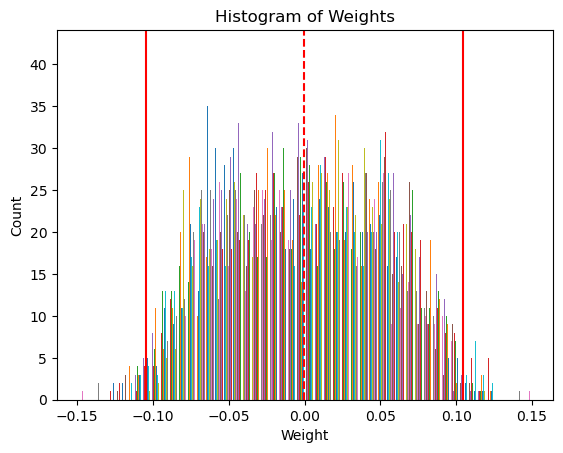

In [237]:
import matplotlib.pyplot as plt
# Calculate the mean and standard deviation of the weights.
mean = np.mean(weights)
sigma = np.std(weights)

# Plot a histogram of the weights.
plt.hist(weights, bins=50)
plt.axvline(mean, color='red', linestyle='dashed')
plt.axvline(mean + 2*sigma, color='red')
plt.axvline(mean - 2*sigma, color='red')
plt.title('Histogram of Weights')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.show()

In [238]:
weights.shape

(648, 65)

In [289]:
def Tweights(weight):
    num = []

    for i in range(weight.shape[1]):
        weight_mean = np.mean(weight[:, i])
        weight_std = np.std(weight[:, i])
        threshold_upper = weight_mean + 1.5 * weight_std
        threshold_lower = weight_mean - 1.5 * weight_std
        nodes_with_weight_above_upper_threshold = np.sum(weight[:, i] > threshold_upper)
        nodes_with_weight_below_lower_threshold = np.sum(weight[:, i] < threshold_lower)
        ten_percent_nodes = int(0.1 * weight.shape[0])

        if nodes_with_weight_above_upper_threshold + nodes_with_weight_below_lower_threshold > ten_percent_nodes:
            num.append(nodes_with_weight_above_upper_threshold + nodes_with_weight_below_lower_threshold)
            print(i, nodes_with_weight_above_upper_threshold, threshold_upper, nodes_with_weight_below_lower_threshold, threshold_lower)

    return num




In [290]:
we = Tweights(weights)
we

0 51 0.07929677495485521 30 -0.07938687896603369
1 31 0.07802639377769083 50 -0.07605574058834463
2 39 0.08222695154836401 42 -0.081826786568854
3 39 0.07402068353258073 50 -0.07612656080164015
4 37 0.08031819091411307 48 -0.08156051038531587
5 42 0.07687779515981674 37 -0.07787644490599632
6 50 0.08116962667554617 43 -0.07568364311009645
7 39 0.07813938959952793 51 -0.07825637355927029
8 41 0.07853219611570239 47 -0.07230110140517354
9 38 0.0804772237315774 44 -0.07964974921196699
10 37 0.07942814938724041 47 -0.07690837047994137
11 51 0.07528823800384998 31 -0.08495954610407352
12 40 0.07986461970722303 46 -0.08102679398143664
13 39 0.0796787234939984 49 -0.07983594583492959
14 47 0.07386121153831482 38 -0.07831498980522156
15 45 0.07599485944956541 36 -0.08035390917211771
16 41 0.07352113141678274 45 -0.07940539554692805
17 46 0.07438416976947337 38 -0.07734633784275502
18 40 0.07933720480650663 50 -0.07504924852401018
19 34 0.08158659050241113 47 -0.0793180107139051
20 39 0.0812923

[81,
 81,
 81,
 89,
 85,
 79,
 93,
 90,
 88,
 82,
 84,
 82,
 86,
 88,
 85,
 81,
 86,
 84,
 90,
 81,
 84,
 85,
 91,
 85,
 81,
 82,
 82,
 91,
 70,
 93,
 85,
 93,
 86,
 86,
 90,
 84,
 91,
 80,
 74,
 91,
 95,
 79,
 93,
 85,
 76,
 87,
 87,
 88,
 75,
 82,
 87,
 94,
 77,
 84,
 79,
 92,
 76,
 80,
 84,
 71,
 86,
 79,
 88,
 87,
 85]

In [291]:
len(we)

65

In [242]:
pred = np.zeros((65,708))
for i in range(weights.shape[1]):
    weight_mean = np.mean(weights[:,i])
    weight_std = np.std(weights[:,i])
    threshold_upper = weight_mean + 1.5 * weight_std
    threshold_lower = weight_mean - 1.5 * weight_std
    nodes_with_weight_above_upper_threshold = np.sum(weights[:, i] > threshold_upper)
    nodes_with_weight_below_lower_threshold = np.sum(weights[:, i] < threshold_lower)
    ten_percent_nodes = int(0.1 * weights.shape[0])
    if (nodes_with_weight_above_upper_threshold + nodes_with_weight_below_lower_threshold) > ten_percent_nodes:
        for h in range(input_data.shape[0]): 
            pred_i = 0
            for j in range(weights.shape[0]):
                weight_value = weights[j,i]
                if weight_value > threshold_upper or weight_value < threshold_lower:
                    pp = np.sum(weight_value*input_data[h,j])
                    pred_i += pp
                    pred[i,h] = pred_i
                

print(pred)

[[ 0.83669567  0.94604343  1.6126106  ...  2.21849682  2.10899371
   1.43599132]
 [-1.07208643 -0.75178886 -0.90715419 ... -1.46711836 -1.5689405
  -1.15020577]
 [ 0.04585628 -0.27381147  0.14283864 ... -0.17553043 -0.49148266
  -0.20588469]
 ...
 [ 0.06567222 -0.00324101 -0.22377235 ... -0.66448411 -0.63229441
  -0.88826316]
 [-0.05793608  0.36638992  0.18724911 ...  0.40299588  0.37856818
   0.29889673]
 [ 0.84661277  0.68611278  1.07951819 ...  1.94970694  1.79303184
   1.34637317]]


In [243]:
weight_value

0.0593147

In [244]:
number_of_zeros = np.count_nonzero( pred == 0)

In [245]:
number_of_zeros

0

In [246]:
pred.shape

(65, 708)

In [247]:
predd = pred[12,:].reshape(59,12)
predd

array([[-0.13151355, -0.22324024, -0.23282172, -0.42402035, -0.39793323,
        -0.99998849, -0.77301665, -0.86991201, -0.84928308, -0.43967556,
        -0.5080049 , -0.49555017],
       [ 0.08025172, -0.75535934, -0.83161945, -0.53911515, -0.51063145,
        -0.64350881, -0.47548669, -0.542936  , -0.84915091, -0.83995508,
        -0.42489362,  0.17117919],
       [-0.13994305, -0.02594351, -0.32540472, -0.18822936, -0.3945121 ,
        -0.69166534, -0.33343066, -0.40812639, -0.34639589, -0.43238057,
        -0.36585524,  0.03415718],
       [ 0.01903831, -0.08512319, -0.52401388, -0.3170779 , -0.42944415,
        -0.16656207, -0.21533619, -0.37552773, -0.40755719,  0.0209134 ,
         0.06662484, -0.06822649],
       [-0.23262709, -0.30798383, -0.18031986, -0.07999629,  0.06053004,
        -0.30014664, -0.28058939, -0.29368759, -0.23345781, -0.09120942,
         0.02491383, -0.02136915],
       [ 0.06233442, -0.13474122, -0.44948856, -0.28537265, -0.15539914,
        -0.75931224, -

In [248]:
df = pd.read_csv("enso_index.csv")
df

year  january  february  march  april   may  june  july  august  \
0   1958     1.54      1.40   0.99   0.31  0.32  0.30  0.04    0.24   
1   1959     0.43      0.50   0.26   0.27 -0.01 -0.33 -0.28   -0.41   
2   1960     0.02     -0.24  -0.08   0.01  0.05 -0.20 -0.25    0.00   
3   1961    -0.15      0.04  -0.10   0.13 -0.01  0.10 -0.32   -0.25   
4   1962    -0.25     -0.16  -0.41  -0.32 -0.42 -0.22 -0.30   -0.13   
5   1963    -0.32     -0.26  -0.06  -0.06  0.00  0.12  0.72    0.90   
6   1964     0.76      0.55  -0.16  -0.53 -0.74 -0.88 -0.65   -0.76   
7   1965    -0.57     -0.36  -0.34  -0.09  0.19  0.45  0.81    1.25   
8   1966     1.13      0.83   0.83   0.54 -0.06  0.14  0.23   -0.10   
9   1967    -0.55     -0.56  -0.47  -0.53 -0.24 -0.12 -0.10   -0.31   
10  1968    -0.60     -0.74  -0.76  -0.47 -0.44  0.19  0.31    0.33   
11  1969     0.90      1.02   0.61   0.33  0.39  0.26  0.10    0.52   
12  1970     0.55      0.36   0.26   0.18  0.01 -0.30 -0.98   -0.95   
13  1971    -1.47     -1.28  -1.29  -0.97 -0.82 -0.78 -0.64   -0.65   
14  1972    -0.58     -0.22  -0.25   0.21  0.33  0.66  0.83    1.30   
15  1973     1.60      1.08   0.58  -0.07 -0.56 -0.86 -1.14   -1.21   
16  1974    -2.02     -1.50  -1.44  -1.00 -0.79 -0.70 -0.65   -0.32   
17  1975    -0.37     -0.33  -0.59  -0.59 -1.00 -1.25 -1.24   -1.16   
18  1976    -1.80     -1.05  -0.68  -0.42 -0.49  0.00  0.15    0.31   
19  1977     0.84      0.55   0.40  -0.25 -0.03  0.36  0.45    0.25   
20  1978     0.72      0.51   0.06  -0.37 -0.49 -0.45 -0.48   -0.62   
21  1979     0.05      0.09   0.13   0.17 -0.09  0.04 -0.20    0.21   
22  1980     0.55      0.33   0.09   0.20  0.13  0.37  0.02   -0.23   
23  1981    -0.45     -0.45  -0.02  -0.17 -0.11 -0.15 -0.43   -0.18   
24  1982    -0.04     -0.13  -0.02   0.24  0.65  0.92  0.64    0.93   
25  1983     2.43      2.22   1.69   1.12  1.12  0.62 -0.11   -0.13   
26  1984    -0.80     -0.53  -0.48  -0.60 -0.64 -0.90 -0.40   -0.40   
27  1985    -0.89     -0.91  -0.96  -0.98 -0.90 -0.76 -0.61   -0.49   
28  1986    -0.79     -0.64  -0.51  -0.41 -0.47 -0.08  0.16    0.24   
29  1987     1.19      1.17   1.24   0.89  0.91  1.24  1.34    1.48   
30  1988     0.69      0.35   0.29  -0.49 -1.05 -1.46 -1.54   -1.44   
31  1989    -1.95     -1.37  -1.33  -1.11 -0.80 -0.64 -0.47   -0.58   
32  1990     0.02      0.36   0.20   0.26  0.32  0.00  0.15    0.17   
33  1991     0.51      0.32   0.10   0.21  0.44  0.65  0.62    0.43   
34  1992     1.61      1.62   1.50   1.41  1.27  0.53  0.27   -0.15   
35  1993     0.28      0.42   0.47   0.92  0.93  0.64  0.33    0.16   
36  1994     0.03     -0.16  -0.06   0.03  0.14  0.27  0.16    0.52   
37  1995     1.10      0.87   0.49   0.27  0.03  0.08  0.03   -0.38   
38  1996    -0.65     -0.66  -0.48  -0.34 -0.40 -0.12 -0.14   -0.30   
39  1997    -0.43     -0.24  -0.06   0.34  0.87  1.15  1.60    1.94   
40  1998     2.42      2.08   1.49   0.90  0.68 -0.39 -0.73   -0.83   
41  1999    -1.53     -1.41  -0.92  -0.81 -0.87 -0.95 -0.84   -0.98   
42  2000    -1.79     -1.53  -1.26  -0.80 -0.80 -0.75 -0.57   -0.36   
43  2001    -0.88     -0.63  -0.48  -0.30 -0.30 -0.11  0.01   -0.07   
44  2002    -0.14      0.00   0.11   0.14  0.21  0.68  0.57    0.70   
45  2003     0.98      0.64   0.48  -0.03 -0.52 -0.19  0.14    0.05   
46  2004     0.26      0.17  -0.10   0.06  0.10  0.14  0.41    0.66   
47  2005     0.56      0.26   0.28   0.28  0.30  0.22 -0.01   -0.04   
48  2006    -0.98     -0.71  -0.73  -0.30 -0.11  0.09  0.03    0.37   
49  2007     0.59      0.12  -0.15  -0.16 -0.39 -0.16 -0.37   -0.57   
50  2008    -1.79     -1.70  -1.17  -0.89 -0.64 -0.44 -0.04   -0.04   
51  2009    -1.00     -0.71  -0.72  -0.25  0.17  0.49  0.69    0.62   
52  2010     1.43      1.18   1.07   0.56 -0.15 -0.62 -0.89   -1.33   
53  2011    -1.70     -1.26  -0.98  -0.74 -0.53 -0.25 -0.23   -0.66   
54  2012    -0.93     -0.61  -0.48  -0.29 -0.18  0.14  0.44    0.66   
55  2013    -0.42     -0.40 

In [249]:
pred_pres = pred[12,:].reshape(59,12)
years = pd.date_range(start='1958', end='2016', freq='YS').year
months = pd.date_range(start='1975-01', periods=12, freq='MS').strftime('%B')
df_pres = pd.DataFrame(pred_pres, index=years, columns=months)
df_pres = df_pres.reset_index()
df_pres['enso_avg'] = df['avg'].copy()
df_pres.loc[-1] = [1957,0,0,0,0,0, df_pres['June'][0],df_pres['July'][0],df_pres['August'][0], df_pres['September'][0],df_pres['October'][0],df_pres['November'][0],df_pres['December'][0],df_pres['enso_avg'][0]]
df_pres.index = df_pres.index + 1  # shifting index
df_pres = df_pres.sort_index() 
df_pres= df_pres.drop('index',axis=1)
df_6 = df_pres.iloc[1:, :5]
df_6 = df_6.reset_index()
df_12 = df_pres.iloc[0:-1, 5:12]
df_12 = df_12.reset_index()
df_13 = df_pres.iloc[1:, [12]]
df_13 = df_13.reset_index()
df_last = pd.concat([df_6, df_12, df_13], axis=1)
df_last = df_last.drop('index',axis=1)
correlation = df_last.corr(method='pearson')

In [250]:
df_12

index      June      July    August  September   October  November  \
0       0 -0.999988 -0.773017 -0.869912  -0.849283 -0.439676 -0.508005   
1       1 -0.999988 -0.773017 -0.869912  -0.849283 -0.439676 -0.508005   
2       2 -0.643509 -0.475487 -0.542936  -0.849151 -0.839955 -0.424894   
3       3 -0.691665 -0.333431 -0.408126  -0.346396 -0.432381 -0.365855   
4       4 -0.166562 -0.215336 -0.375528  -0.407557  0.020913  0.066625   
5       5 -0.300147 -0.280589 -0.293688  -0.233458 -0.091209  0.024914   
6       6 -0.759312 -0.116612 -0.241972  -0.071916  0.015677  0.006939   
7       7 -0.237246  0.332565 -0.393390  -0.145639 -0.062317  0.183618   
8       8 -0.629941 -0.016294 -0.113330  -0.292530 -0.385282 -0.246881   
9       9 -0.731025 -0.248688 -0.443555  -0.262427 -0.221025  0.137437   
10     10 -0.532158  0.011518 -0.298966  -0.362794 -0.057446  0.064279   
11     11 -0.658080 -0.708939 -1.003135  -0.141510 -0.237421 -0.221769   
12     12 -0.695190 -0.447165 -0.109249  -0.171645 -0.268768  0.042144   
13     13 -0.888318 -0.288398 -0.464772  -0.095901 -0.103182  0.076019   
14     14 -0.355612 -0.012642  0.199069  -0.213599 -0.240651  0.012622   
15     15 -0.164291 -0.296820  0.015197  -0.799376 -0.451380 -0.207327   
16     16 -0.710507 -0.130098 -0.418138  -0.504136 -0.028789 -0.038482   
17     17  0.100899 -0.227819 -0.430291  -0.216472  0.114868  0.361260   
18     18  0.058930  0.238855 -0.151354   0.210352  0.183006  0.278873   
19     19 -0.279445 -0.301139 -0.233912  -0.268307 -0.006531  0.366005   
20     20 -0.322519 -0.530178 -0.317711  -0.560593 -0.607588 -0.007294   
21     21 -0.457479 -0.310079 -0.523032  -0.161761 -0.080901 -0.254854   
22     22 -0.741138 -0.359094 -0.580021  -0.245809 -0.625643 -0.151380   
23     23 -0.852992 -0.251098 -0.171900  -0.419264 -0.356057  0.004872   
24     24 -0.524473  0.041466  0.028732  -0.303786 -0.052415 -0.081400   
25     25 -0.812308 -0.104563 -0.591909  -0.326278 -0.158294 -0.212273   
26     26 -0.094898 -0.065147 -0.313470  -0.107721 -0.117429 -0.436028   
27     27 -0.334041  0.397298 -0.068734  -0.288699 -0.393922 -0.262984   
28     28 -0.368655 -0.343540  0.161153  -0.237570 -0.403879 -0.634313   
29     29 -0.715566 -0.053212 -0.269534  -0.445015 -0.596889 -0.567052   
30     30 -0.316051 -0.035592 -0.504451  -0.022787 -0.395661 -0.421218   
31     31 -0.187782 -0.048487 -0.245960  -0.134322  0.099385 -0.378408   
32     32 -0.159725  0.293048 -0.388240  -0.184403 -0.381216 -0.268632   
33     33 -0.606827 -0.299595 -0.801560  -0.459040 -0.445832 -0.289443   
34     34 -0.419062 -0.293839 -0.650006  -0.651409 -0.268082 -0.134029   
35     35 -0.494400 -0.469935 -0.481829  -0.202467 -0.169459 -0.083073   
36     36 -0.793364 -0.419430 -0.258535  -0.679702 -0.454151 -0.565395   
37     37 -0.247332 -0.350771 -0.350798   0.088182 -0.352519 -0.449856   
38     38 -0.397512 -0.539621 -0.541320  -0.674217 -0.471083 -0.521409   
39     39 -0.428463  0.274605  0.230696  -0.126907 -0.283475 -0.163373   
40     40 -0.371413 -0.597129 -0.291725  -0.623933 -0.483094 -0.556418   
41     41 -0.198838 -0.020401 -0.352972  -0.425668 -0.426440 -0.261849   
42     42  0.313450 -0.211879 -0.329188  -0.292361 -0.031632 -0.309677   
43     43 -0.213510  0.320901 -0.194651  -0.488957 -0.342760  0.255740   
44     44 -0.353420  0.235224 -0.493617  -0.099074 -0.719871 -0.321010   
45     45 -0.671253 -0.090619 -0.574668  -0.633904 -0.737944 -0.478587   
46     46 -0.972547 -0.428716 -0.310799  -0.612258 -0.340758 -0.518206   
47     47 -1.081538 -0.550762 -0.965355  -0.387407 -0.363470 -0.649929   
48     48 -0.945487 -0.561294 -0.593309  -0.604977 -0.642198 -0.339427   
49     49 -0.172652 -0.461838 -0.233825  -0.836059 -0.797896 -0.437889   
50     50 -0.742393 -0.002932 -0.651371  -0.839301 -0.669123 -0.500333   
51     51 -0.652326 -0.339334 -0.055980  -0.384183 -0.249346 -0.309368   
52     52 -0.441703 -0.267402 -0.715649  -0.558068 -0.864855 -0.468358   
53     5

In [251]:
df_pres

January  February     March     April       May      June      July  \
0   0.000000  0.000000  0.000000  0.000000  0.000000 -0.999988 -0.773017   
1  -0.131514 -0.223240 -0.232822 -0.424020 -0.397933 -0.999988 -0.773017   
2   0.080252 -0.755359 -0.831619 -0.539115 -0.510631 -0.643509 -0.475487   
3  -0.139943 -0.025944 -0.325405 -0.188229 -0.394512 -0.691665 -0.333431   
4   0.019038 -0.085123 -0.524014 -0.317078 -0.429444 -0.166562 -0.215336   
5  -0.232627 -0.307984 -0.180320 -0.079996  0.060530 -0.300147 -0.280589   
6   0.062334 -0.134741 -0.449489 -0.285373 -0.155399 -0.759312 -0.116612   
7  -0.108535 -0.327143 -0.529126 -0.317705 -0.311350 -0.237246  0.332565   
8   0.289232 -0.030372 -0.068700 -0.179819 -0.003300 -0.629941 -0.016294   
9  -0.062286 -0.147275  0.538824 -0.009857 -0.146868 -0.731025 -0.248688   
10  0.132277 -0.170349 -0.155815 -0.437884 -0.319288 -0.532158  0.011518   
11 -0.190744 -0.017945  0.091165 -0.437739 -0.042849 -0.658080 -0.708939   
12  0.082149 -0.033043 -0.394648 -0.267066 -0.342465 -0.695190 -0.447165   
13 -0.327181 -0.445417 -0.131316 -0.355155 -0.662544 -0.888318 -0.288398   
14  0.333796 -0.263024 -0.094164  0.239950 -0.146161 -0.355612 -0.012642   
15 -0.493773 -0.006148 -0.237669 -0.201391  0.003488 -0.164291 -0.296820   
16 -0.735367 -0.383686 -0.659683 -0.521292 -0.210272 -0.710507 -0.130098   
17 -0.475678 -0.056093 -0.287611 -0.425976  0.016544  0.100899 -0.227819   
18  0.062901 -0.230353  0.174428  0.084973  0.379906  0.058930  0.238855   
19  0.199400  0.012042 -0.187803  0.268303  0.226381 -0.279445 -0.301139   
20 -0.039328 -0.044854 -0.084315  0.078320  0.147419 -0.322519 -0.530178   
21  0.014920 -0.207493 -0.063563  0.166029 -0.204379 -0.457479 -0.310079   
22  0.238170 -0.117253 -0.047961  0.014912  0.064077 -0.741138 -0.359094   
23 -0.393919 -0.519810 -0.636951 -0.132954 -0.353622 -0.852992 -0.251098   
24  0.371863 -0.059095 -0.054258 -0.311230 -0.061908 -0.524473  0.041466   
25 -0.221067 -0.477062 -0.638370 -0.311958  0.024818 -0.812308 -0.104563   
26 -0.289329 -0.383768 -0.657157  0.137022 -0.255707 -0.094898 -0.065147   
27  0.013819 -0.149064  0.112291 -0.226451  0.222816 -0.334041  0.397298   
28 -0.081870 -0.484871 -0.032580 -0.106426 -0.201278 -0.368655 -0.343540   
29 -0.025496  0.007967  0.042058  0.377561 -0.161914 -0.715566 -0.053212   
30 -0.103639 -0.162694 -0.032690 -0.361756  0.072175 -0.316051 -0.035592   
31 -0.200540 -0.421228  0.033038 -0.035194 -0.185072 -0.187782 -0.048487   
32 -0.039227 -0.062255  0.194410  0.143776 -0.400863 -0.159725  0.293048   
33 -0.393164 -0.475656 -0.311199 -0.160364 -1.156545 -0.606827 -0.299595   
34 -0.715094 -0.224708 -0.537308  0.080631 -0.691297 -0.419062 -0.293839   
35 -0.268391 -0.453517 -0.649515 -0.164338 -0.249453 -0.494400 -0.469935   
36  0.032069 -0.537223 -0.164881 -0.416488 -0.122652 -0.793364 -0.419430   
37 -0.235937 -0.702826 -0.144756 -0.190669 -0.170652 -0.247332 -0.350771   
38 -0.101115 -0.283633  0.102894 -0.613432 -0.683762 -0.397512 -0.539621   
39 -0.223863  0.179529 -0.318144 -0.463986 -0.576123 -0.428463  0.274605   
40 -0.267783 -0.452369 -0.824073 -0.491507 -0.309938 -0.371413 -0.597129   
41 -0.521151 -0.377329 -0.641673 -0.547808 -0.171899 -0.198838 -0.020401   
42  0.212917  0.276699  0.507856  0.076652 -0.012693  0.313450 -0.211879   
43 -0.207511  0.032081  0.190956  0.149069 -0.056515 -0.213510  0.320901   
44 -0.028558 -0.076407  0.009798 -0.149138  0.254961 -0.353420  0.235224   
45 -0.572345 -0.330438 -0.772405 -0.325342 -1.084588 -0.671253 -0.090619   
46 -0.309815 -0.532720 -0.728704 -0.698316 -0.484399 -0.972547 -0.428716   
47 -0.653748 -0.392283 -0.332815 -0.616264 -0.527853 -1.081538 -0.550762   
48 -0.441766 -0.597127 -0.600764 -0.061658 -0.358435 -0.945487 -0.561294   
49 -0.415861 -0.360515  0.058914 -0.305070 -0.379315 -0.172652 -0.461838   
50 -0.168614 -0.781395 -0.251772 -0.843166 -0.147986 -0.742393 -0.002932   
51 -0.063314 -0.618753  0.068708 -0.034486 -0.253935 

In [252]:
df_last

January  February     March     April       May      June      July  \
0  -0.131514 -0.223240 -0.232822 -0.424020 -0.397933 -0.999988 -0.773017   
1   0.080252 -0.755359 -0.831619 -0.539115 -0.510631 -0.999988 -0.773017   
2  -0.139943 -0.025944 -0.325405 -0.188229 -0.394512 -0.643509 -0.475487   
3   0.019038 -0.085123 -0.524014 -0.317078 -0.429444 -0.691665 -0.333431   
4  -0.232627 -0.307984 -0.180320 -0.079996  0.060530 -0.166562 -0.215336   
5   0.062334 -0.134741 -0.449489 -0.285373 -0.155399 -0.300147 -0.280589   
6  -0.108535 -0.327143 -0.529126 -0.317705 -0.311350 -0.759312 -0.116612   
7   0.289232 -0.030372 -0.068700 -0.179819 -0.003300 -0.237246  0.332565   
8  -0.062286 -0.147275  0.538824 -0.009857 -0.146868 -0.629941 -0.016294   
9   0.132277 -0.170349 -0.155815 -0.437884 -0.319288 -0.731025 -0.248688   
10 -0.190744 -0.017945  0.091165 -0.437739 -0.042849 -0.532158  0.011518   
11  0.082149 -0.033043 -0.394648 -0.267066 -0.342465 -0.658080 -0.708939   
12 -0.327181 -0.445417 -0.131316 -0.355155 -0.662544 -0.695190 -0.447165   
13  0.333796 -0.263024 -0.094164  0.239950 -0.146161 -0.888318 -0.288398   
14 -0.493773 -0.006148 -0.237669 -0.201391  0.003488 -0.355612 -0.012642   
15 -0.735367 -0.383686 -0.659683 -0.521292 -0.210272 -0.164291 -0.296820   
16 -0.475678 -0.056093 -0.287611 -0.425976  0.016544 -0.710507 -0.130098   
17  0.062901 -0.230353  0.174428  0.084973  0.379906  0.100899 -0.227819   
18  0.199400  0.012042 -0.187803  0.268303  0.226381  0.058930  0.238855   
19 -0.039328 -0.044854 -0.084315  0.078320  0.147419 -0.279445 -0.301139   
20  0.014920 -0.207493 -0.063563  0.166029 -0.204379 -0.322519 -0.530178   
21  0.238170 -0.117253 -0.047961  0.014912  0.064077 -0.457479 -0.310079   
22 -0.393919 -0.519810 -0.636951 -0.132954 -0.353622 -0.741138 -0.359094   
23  0.371863 -0.059095 -0.054258 -0.311230 -0.061908 -0.852992 -0.251098   
24 -0.221067 -0.477062 -0.638370 -0.311958  0.024818 -0.524473  0.041466   
25 -0.289329 -0.383768 -0.657157  0.137022 -0.255707 -0.812308 -0.104563   
26  0.013819 -0.149064  0.112291 -0.226451  0.222816 -0.094898 -0.065147   
27 -0.081870 -0.484871 -0.032580 -0.106426 -0.201278 -0.334041  0.397298   
28 -0.025496  0.007967  0.042058  0.377561 -0.161914 -0.368655 -0.343540   
29 -0.103639 -0.162694 -0.032690 -0.361756  0.072175 -0.715566 -0.053212   
30 -0.200540 -0.421228  0.033038 -0.035194 -0.185072 -0.316051 -0.035592   
31 -0.039227 -0.062255  0.194410  0.143776 -0.400863 -0.187782 -0.048487   
32 -0.393164 -0.475656 -0.311199 -0.160364 -1.156545 -0.159725  0.293048   
33 -0.715094 -0.224708 -0.537308  0.080631 -0.691297 -0.606827 -0.299595   
34 -0.268391 -0.453517 -0.649515 -0.164338 -0.249453 -0.419062 -0.293839   
35  0.032069 -0.537223 -0.164881 -0.416488 -0.122652 -0.494400 -0.469935   
36 -0.235937 -0.702826 -0.144756 -0.190669 -0.170652 -0.793364 -0.419430   
37 -0.101115 -0.283633  0.102894 -0.613432 -0.683762 -0.247332 -0.350771   
38 -0.223863  0.179529 -0.318144 -0.463986 -0.576123 -0.397512 -0.539621   
39 -0.267783 -0.452369 -0.824073 -0.491507 -0.309938 -0.428463  0.274605   
40 -0.521151 -0.377329 -0.641673 -0.547808 -0.171899 -0.371413 -0.597129   
41  0.212917  0.276699  0.507856  0.076652 -0.012693 -0.198838 -0.020401   
42 -0.207511  0.032081  0.190956  0.149069 -0.056515  0.313450 -0.211879   
43 -0.028558 -0.076407  0.009798 -0.149138  0.254961 -0.213510  0.320901   
44 -0.572345 -0.330438 -0.772405 -0.325342 -1.084588 -0.353420  0.235224   
45 -0.309815 -0.532720 -0.728704 -0.698316 -0.484399 -0.671253 -0.090619   
46 -0.653748 -0.392283 -0.332815 -0.616264 -0.527853 -0.972547 -0.428716   
47 -0.441766 -0.597127 -0.600764 -0.061658 -0.358435 -1.081538 -0.550762   
48 -0.415861 -0.360515  0.058914 -0.305070 -0.379315 -0.945487 -0.561294   
49 -0.168614 -0.781395 -0.251772 -0.843166 -0.147986 -0.172652 -0.461838   
50 -0.063314 -0.618753  0.068708 -0.034486 -0.253935 -0.742393 -0.002932   
51 -0.533327 -0.130407 -0.172058 -0.488956 -0.796743 

In [253]:
correlation

January  February     March     April       May      June  \
January    1.000000  0.402558  0.466280  0.337835  0.424952  0.006044   
February   0.402558  1.000000  0.527518  0.390542  0.263303  0.257371   
March      0.466280  0.527518  1.000000  0.463653  0.381532  0.270452   
April      0.337835  0.390542  0.463653  1.000000  0.324829  0.214470   
May        0.424952  0.263303  0.381532  0.324829  1.000000  0.294110   
June       0.006044  0.257371  0.270452  0.214470  0.294110  1.000000   
July       0.166430  0.206434  0.200035  0.204645  0.201249  0.381581   
August     0.000693  0.176731  0.219167  0.044608  0.305879  0.397932   
September  0.318877  0.287398  0.231123  0.378763  0.130774  0.311439   
October    0.353041  0.379906  0.273011  0.350871  0.460654  0.229432   
November   0.386756  0.332827  0.188066  0.238944  0.430262  0.228208   
December   0.458725  0.408787  0.324951  0.238541  0.367259 -0.038292   
enso_avg  -0.152191 -0.019150 -0.256902 -0.131486 -0.029830 -0.119973   

               July    August  September   October  November  December  \
January    0.166430  0.000693   0.318877  0.353041  0.386756  0.458725   
February   0.206434  0.176731   0.287398  0.379906  0.332827  0.408787   
March      0.200035  0.219167   0.231123  0.273011  0.188066  0.324951   
April      0.204645  0.044608   0.378763  0.350871  0.238944  0.238541   
May        0.201249  0.305879   0.130774  0.460654  0.430262  0.367259   
June       0.381581  0.397932   0.311439  0.229432  0.228208 -0.038292   
July       1.000000  0.465449   0.431376  0.261540  0.348875  0.193588   
August     0.465449  1.000000   0.305319  0.238121  0.267766  0.133423   
September  0.431376  0.305319   1.000000  0.582923  0.435136  0.297656   
October    0.261540  0.238121   0.582923  1.000000  0.647957  0.551542   
November   0.348875  0.267766   0.435136  0.647957  1.000000  0.668238   
December   0.193588  0.133423   0.297656  0.551542  0.668238  1.000000   
enso_avg   0.219280  0.192726   0.072233 -0.048741 -0.086484 -0.023081   

           enso_avg  
January   -0.152191  
February  -0.019150  
March     -0.256902  
April     -0.131486  
May       -0.029830  
June      -0.119973  
July       0.219280  
August     0.192726  
September  0.072233  
October   -0.048741  
November  -0.086484  
December  -0.023081  
enso_avg   1.000000

In [254]:
def potential_predictors_new(data):
    global top_correlation
    top_correlation = []
    top_preds = pd.DataFrame()
    for i in range(65):
        pred_pres = data[i,:].reshape(59,12)
        # Create year and month ranges
        years = pd.date_range(start='1958', end='2016', freq='YS').year
        months = pd.date_range(start='1975-01', periods=12, freq='MS').strftime('%B')
        # Create the DataFrame
        
        df_pres = pd.DataFrame(pred_pres, index=years, columns=months)
        df_pres = df_pres.reset_index()
        df_pres['enso_avg'] = df['avg'].copy()
        df_pres.loc[-1] = [1957,0,0,0,0,0, df_pres['June'][0],df_pres['July'][0],df_pres['August'][0], df_pres['September'][0],df_pres['October'][0],df_pres['November'][0],df_pres['December'][0],df_pres['enso_avg'][0]]
        df_pres.index = df_pres.index + 1  # shifting index
        df_pres = df_pres.sort_index() 
        df_pres= df_pres.drop('index',axis=1)
        df_6 = df_pres.iloc[1:, :5]
        df_6 = df_6.reset_index()
        df_12 = df_pres.iloc[0:-1, 5:12]
        df_12 = df_12.reset_index()
        df_13 = df_pres.iloc[1:, [12]]
        df_13 = df_13.reset_index()
        df_last = pd.concat([df_6, df_12, df_13], axis=1)
        df_last = df_last.drop('index',axis=1)
        correlation = df_last.corr(method='pearson')
        second_max_value = correlation['enso_avg'].sort_values(ascending=False)[1]
        negative_minimum = correlation['enso_avg'].sort_values(ascending=False)[-1]
        second_max_index = correlation['enso_avg'].sort_values(ascending=False).index[1]
        negative_min_index = correlation['enso_avg'].sort_values(ascending=False).index[-1]
        if abs(second_max_value) > abs(negative_minimum):
            highest_correlation = second_max_value
            highest_correlation_index = second_max_index
            
        else:
            highest_correlation = negative_minimum
            highest_correlation_index = negative_min_index
            
        column_name = highest_correlation_index
        suffix_index = 1
        while column_name in top_preds.columns:
            suffix_index += 1
            column_name = f"{highest_correlation_index}_{suffix_index}"
        
        top_preds[column_name] = df_last[highest_correlation_index]
        top_correlation.append((i, highest_correlation,column_name , abs(highest_correlation)))
        print(i,highest_correlation,column_name,abs(highest_correlation))
        result_df = pd.DataFrame(top_correlation, columns=['Iteration', 'Correlation', 'Column_Name', 'Absolute_Correlation'])
    return top_preds,result_df
        
    

In [255]:
top_predp,resultp = potential_predictors_new(pred)

0 -0.2192309660279563 July 0.2192309660279563
1 0.1253237433069147 March 0.1253237433069147
2 0.2634859383637047 April 0.2634859383637047
3 0.1985784580319276 July_2 0.1985784580319276
4 -0.45417189981379535 August 0.45417189981379535
5 0.3780328379383385 May 0.3780328379383385
6 0.354530111219203 August_2 0.354530111219203
7 0.2159157921911052 February 0.2159157921911052
8 -0.2883615890119243 November 0.2883615890119243
9 -0.18943673339109107 April_2 0.18943673339109107
10 -0.24211849985700695 January 0.24211849985700695
11 0.20464347678753658 January_2 0.20464347678753658
12 -0.25690167332873426 March_2 0.25690167332873426
13 0.3085849851062425 July_3 0.3085849851062425
14 -0.1779806285043547 April_3 0.1779806285043547
15 -0.2728480314188085 November_2 0.2728480314188085
16 -0.3405582174334048 November_3 0.3405582174334048
17 0.19809363806946428 August_3 0.19809363806946428
18 -0.16285220409235784 November_4 0.16285220409235784
19 0.3708688399993333 June 0.3708688399993333
20 0.22178

In [256]:
resultp = resultp.sort_values(by='Absolute_Correlation', ascending=False)
resultp

Iteration  Correlation  Column_Name  Absolute_Correlation
4           4    -0.454172       August              0.454172
36         36    -0.437712      April_6              0.437712
44         44     0.430712   February_3              0.430712
28         28     0.412703   November_7              0.412703
57         57     0.407507        May_7              0.407507
..        ...          ...          ...                   ...
34         34    -0.190315  September_4              0.190315
9           9    -0.189437      April_2              0.189437
14         14    -0.177981      April_3              0.177981
18         18    -0.162852   November_4              0.162852
1           1     0.125324        March              0.125324

[65 rows x 4 columns]

In [257]:
unique_values_listp = resultp['Column_Name'].unique().tolist()

In [258]:
top_predp = top_predp[unique_values_listp]

In [259]:
top_predp

August   April_6  February_3  November_7     May_7     May_4  April_11  \
0  -0.469484 -0.192907    0.483186   -0.069001  0.056523 -0.175275 -0.139798   
1  -0.469484 -0.155950    0.116145   -0.069001  0.650787 -0.767088 -0.343262   
2  -0.720683 -0.271062    0.471996    0.137035 -0.117836 -0.225223 -0.176245   
3  -0.270299  0.424437    0.420501    0.076111  0.573503 -0.321780 -0.350389   
4  -0.794188 -0.115674    0.158944    0.070612 -0.201221 -0.419739 -0.457755   
5  -0.810097  0.022826    0.522460    0.075670  0.868295 -0.525846 -0.221788   
6  -0.177833  0.090922    0.014395   -0.043532  0.184597 -0.043810  0.146627   
7  -1.010284 -0.177244    0.171814    0.232178  0.145341 -0.391165  0.111823   
8  -0.426508 -0.057897    0.445708    0.274656  0.333250 -0.261227  0.077770   
9  -0.589004  0.377096    0.261804    0.081320  0.446709 -0.571863 -0.154538   
10 -0.508138  0.334326    0.465199    0.236844  0.231010 -0.505085 -0.195763   
11 -0.157695  0.484893    0.244581    0.175649  0.382020 -0.594258 -0.161660   
12 -0.057424  0.551070    0.096500   -0.317594  0.420440 -0.550491 -0.051273   
13 -0.743766  0.572507    0.333806    0.031158  0.080987 -0.404356 -0.084647   
14 -0.845307  0.274774    0.352461    0.148502  0.667429 -0.608884 -0.150287   
15  0.022840  0.068549    0.196864   -0.297814  0.173762 -0.575092 -0.319073   
16 -0.668412  0.007659    0.483426   -0.023469  0.435828 -0.170720 -0.067115   
17 -0.797616  0.488492    0.247179   -0.203698  0.172119 -0.198763 -0.546462   
18 -1.059092  0.215832    0.358140   -0.078054  0.497148 -0.411539 -0.067374   
19 -0.437608  0.189262    0.431020   -0.134156  0.350859 -0.977604  0.033085   
20 -0.658091  0.424504    0.368795   -0.306383  0.253109 -0.368971  0.035218   
21 -0.866576  0.088431    0.273820    0.004118  0.519236 -0.598015  0.344285   
22 -0.899598 -0.170636    0.607189   -0.233014  0.418227 -0.070184  0.196858   
23 -0.694944  0.160750    0.425008   -0.135459  0.722396 -0.716888 -0.253765   
24 -0.782615 -0.103443    0.518474   -0.225240  0.243054 -0.567340  0.076128   
25 -0.515197  0.467573    0.378434    0.505300  0.380592 -0.565253  0.037681   
26 -0.223814  0.209547    0.283115   -0.347517  0.587398 -0.912115 -0.233703   
27 -0.796961  0.258291    0.130374   -0.021144  0.488550 -0.486629  0.153029   
28 -1.035925  0.251720    0.657592   -0.087540  0.267687 -0.642474  0.146892   
29 -1.033375 -0.009784    0.524346    0.058518  0.612330 -0.839966  0.216212   
30 -0.062094  0.665729    0.033915   -0.535532  0.133563 -0.057363 -0.124561   
31 -0.411049  0.213110    0.190141   -0.084610  0.332286 -0.949919 -0.521395   
32 -0.841190  0.074446    0.326841   -0.083421  0.213819 -0.593693 -0.139217   
33 -0.832795  0.040981    0.651757   -0.171555  0.520987 -0.637474 -0.079620   
34 -0.864321 -0.183152    0.529202    0.073099  0.708655 -1.465676 -0.101057   
35 -0.557614 -0.030128    0.514517    0.110399  0.637498 -1.143802 -0.120001   
36 -0.431356  0.108277    0.313176    0.003067  0.381741 -0.677969 -0.315031   
37 -0.947460  0.013706    0.322641    0.219741  0.200599 -0.796513 -0.699852   
38 -0.195066  0.301585    0.378289    0.440127  0.307844 -0.781170 -0.280432   
39 -0.809278 -0.154568    0.461420    0.479932  0.482336 -0.940303  0.355944   
40 -0.575750  0.693824    0.208526    0.556011 -0.209821  0.225964 -0.554980   
41 -0.685616  0.577300    0.212041   -0.149135  0.017713 -0.416839 -0.782115   
42 -0.960741  0.496532    0.464546    0.076276  0.138547 -0.489539 -0.506736   
43 -0.785014  0.272305    0.527591   -0.000233 -0.282776 -0.480705 -0.158381   
44 -1.129207  0.231853    0.234869   -0.331631  0.543379 -0.497181  0.237430   
45 -0.413180  0.568305    0.406447    0.046345  0.133375 -0.220992 -0.320745   
46 -0.669047  0.145854    0.388426    0.176253  0.120069 -0.476177 -0.241148   
47 -0.763223  0.407086    0.215182    0.143257  0.224655 -1.259505 -0.049664   
48 -0.582140  0.435672    0.346305    0.201667 -0.242156 -0.792219 -0.735551   
49 -0.

In [260]:
top_predp.to_csv('pearson_corr.csv', index=False)

In [261]:
def potential_predictors_new(data):
    global top_correlation
    top_correlation = []
    top_preds = pd.DataFrame()
    for i in range(65):
        pred_pres = data[i,:].reshape(59,12)
        # Create year and month ranges
        years = pd.date_range(start='1958', end='2016', freq='YS').year
        months = pd.date_range(start='1975-01', periods=12, freq='MS').strftime('%B')
        # Create the DataFrame
        
        df_pres = pd.DataFrame(pred_pres, index=years, columns=months)
        df_pres = df_pres.reset_index()
        df_pres['enso_avg'] = df['avg'].copy()
        df_pres.loc[-1] = [1957,0,0,0,0,0, df_pres['June'][0],df_pres['July'][0],df_pres['August'][0], df_pres['September'][0],df_pres['October'][0],df_pres['November'][0],df_pres['December'][0],df_pres['enso_avg'][0]]
        df_pres.index = df_pres.index + 1  # shifting index
        df_pres = df_pres.sort_index() 
        df_pres= df_pres.drop('index',axis=1)
        df_6 = df_pres.iloc[1:, :5]
        df_6 = df_6.reset_index()
        df_12 = df_pres.iloc[0:-1, 5:12]
        df_12 = df_12.reset_index()
        df_13 = df_pres.iloc[1:, [12]]
        df_13 = df_13.reset_index()
        df_last = pd.concat([df_6, df_12, df_13], axis=1)
        df_last = df_last.drop('index',axis=1)
        correlation = df_last.corr(method='kendall')
        second_max_value = correlation['enso_avg'].sort_values(ascending=False)[1]
        negative_minimum = correlation['enso_avg'].sort_values(ascending=False)[-1]
        second_max_index = correlation['enso_avg'].sort_values(ascending=False).index[1]
        negative_min_index = correlation['enso_avg'].sort_values(ascending=False).index[-1]
        if abs(second_max_value) > abs(negative_minimum):
            highest_correlation = second_max_value
            highest_correlation_index = second_max_index
            
        else:
            highest_correlation = negative_minimum
            highest_correlation_index = negative_min_index
            
        column_name = highest_correlation_index
        suffix_index = 1
        while column_name in top_preds.columns:
            suffix_index += 1
            column_name = f"{highest_correlation_index}_{suffix_index}"
        
        top_preds[column_name] = df_last[highest_correlation_index]
        top_correlation.append((i, highest_correlation,column_name , abs(highest_correlation)))
        print(i,highest_correlation,column_name,abs(highest_correlation))
        result_df = pd.DataFrame(top_correlation, columns=['Iteration', 'Correlation', 'Column_Name', 'Absolute_Correlation'])
    return top_preds,result_df
        
    

In [262]:
top_predk,resultk = potential_predictors_new(pred)

0 0.14983909784309105 September 0.14983909784309105
1 0.10590996134805383 March 0.10590996134805383
2 0.15857237306808059 May 0.15857237306808059
3 0.11354994133421743 July 0.11354994133421743
4 -0.2903132520709889 August 0.2903132520709889
5 0.22293754294811333 May_2 0.22293754294811333
6 0.23178235447603143 September_2 0.23178235447603143
7 0.17378595867608834 February 0.17378595867608834
8 -0.22241741086083824 November 0.22241741086083824
9 -0.15038044235607645 April 0.15038044235607645
10 -0.1796373377560913 January 0.1796373377560913
11 0.08250444502804194 January_2 0.08250444502804194
12 -0.15272099398807762 March_2 0.15272099398807762
13 0.23412359037982972 July_2 0.23412359037982972
14 -0.114101892060058 April_2 0.114101892060058
15 -0.1662277491696791 August_2 0.1662277491696791
16 -0.24934162375451865 November_2 0.24934162375451865
17 0.11878299532406038 January_3 0.11878299532406038
18 -0.0936494361519319 July_3 0.0936494361519319
19 -0.2697485755881371 April_3 0.26974857558

In [263]:
resultk = resultk.sort_values(by='Absolute_Correlation', ascending=False)
resultk

Iteration  Correlation Column_Name  Absolute_Correlation
44         44     0.299005  February_2              0.299005
46         46    -0.293154       May_6              0.293154
4           4    -0.290313      August              0.290313
36         36    -0.283792     April_7              0.283792
19         19    -0.269749     April_3              0.269749
..        ...          ...         ...                   ...
3           3     0.113550        July              0.113550
37         37    -0.112932     April_8              0.112932
1           1     0.105910       March              0.105910
18         18    -0.093649      July_3              0.093649
11         11     0.082504   January_2              0.082504

[65 rows x 4 columns]

In [264]:
unique_values_listk = resultk['Column_Name'].unique().tolist()

In [265]:
top_predk = top_predk[unique_values_listk]

In [266]:
top_predk

February_2     May_6    August   April_7   April_3    May_10  April_13  \
0     0.483186 -0.175275 -0.469484 -0.192907 -0.510503  0.056523 -0.139798   
1     0.116145 -0.767088 -0.469484 -0.155950 -0.239307  0.650787 -0.343262   
2     0.471996 -0.225223 -0.720683 -0.271062 -0.490269 -0.117836 -0.176245   
3     0.420501 -0.321780 -0.270299  0.424437 -0.429062  0.573503 -0.350389   
4     0.158944 -0.419739 -0.794188 -0.115674 -0.327994 -0.201221 -0.457755   
5     0.522460 -0.525846 -0.810097  0.022826 -0.711481  0.868295 -0.221788   
6     0.014395 -0.043810 -0.177833  0.090922 -0.023152  0.184597  0.146627   
7     0.171814 -0.391165 -1.010284 -0.177244 -0.588995  0.145341  0.111823   
8     0.445708 -0.261227 -0.426508 -0.057897 -0.479884  0.333250  0.077770   
9     0.261804 -0.571863 -0.589004  0.377096 -0.374410  0.446709 -0.154538   
10    0.465199 -0.505085 -0.508138  0.334326 -0.434295  0.231010 -0.195763   
11    0.244581 -0.594258 -0.157695  0.484893 -0.463234  0.382020 -0.161660   
12    0.096500 -0.550491 -0.057424  0.551070 -0.323603  0.420440 -0.051273   
13    0.333806 -0.404356 -0.743766  0.572507 -0.274696  0.080987 -0.084647   
14    0.352461 -0.608884 -0.845307  0.274774 -0.588556  0.667429 -0.150287   
15    0.196864 -0.575092  0.022840  0.068549 -0.262094  0.173762 -0.319073   
16    0.483426 -0.170720 -0.668412  0.007659 -0.340323  0.435828 -0.067115   
17    0.247179 -0.198763 -0.797616  0.488492 -0.568189  0.172119 -0.546462   
18    0.358140 -0.411539 -1.059092  0.215832 -0.657684  0.497148 -0.067374   
19    0.431020 -0.977604 -0.437608  0.189262 -0.516544  0.350859  0.033085   
20    0.368795 -0.368971 -0.658091  0.424504 -0.542961  0.253109  0.035218   
21    0.273820 -0.598015 -0.866576  0.088431 -0.385256  0.519236  0.344285   
22    0.607189 -0.070184 -0.899598 -0.170636 -0.948126  0.418227  0.196858   
23    0.425008 -0.716888 -0.694944  0.160750 -0.286648  0.722396 -0.253765   
24    0.518474 -0.567340 -0.782615 -0.103443 -0.744531  0.243054  0.076128   
25    0.378434 -0.565253 -0.515197  0.467573 -0.564827  0.380592  0.037681   
26    0.283115 -0.912115 -0.223814  0.209547 -0.539879  0.587398 -0.233703   
27    0.130374 -0.486629 -0.796961  0.258291 -0.531012  0.488550  0.153029   
28    0.657592 -0.642474 -1.035925  0.251720 -0.877572  0.267687  0.146892   
29    0.524346 -0.839966 -1.033375 -0.009784 -0.606927  0.612330  0.216212   
30    0.033915 -0.057363 -0.062094  0.665729 -0.627581  0.133563 -0.124561   
31    0.190141 -0.949919 -0.411049  0.213110 -0.973872  0.332286 -0.521395   
32    0.326841 -0.593693 -0.841190  0.074446 -0.502868  0.213819 -0.139217   
33    0.651757 -0.637474 -0.832795  0.040981 -0.687596  0.520987 -0.079620   
34    0.529202 -1.465676 -0.864321 -0.183152 -0.697204  0.708655 -0.101057   
35    0.514517 -1.143802 -0.557614 -0.030128 -0.973692  0.637498 -0.120001   
36    0.313176 -0.677969 -0.431356  0.108277 -0.728457  0.381741 -0.315031   
37    0.322641 -0.796513 -0.947460  0.013706 -0.826396  0.200599 -0.699852   
38    0.378289 -0.781170 -0.195066  0.301585 -0.916167  0.307844 -0.280432   
39    0.461420 -0.940303 -0.809278 -0.154568 -0.453759  0.482336  0.355944   
40    0.208526  0.225964 -0.575750  0.693824 -0.199919 -0.209821 -0.554980   
41    0.212041 -0.416839 -0.685616  0.577300 -0.400329  0.017713 -0.782115   
42    0.464546 -0.489539 -0.960741  0.496532 -0.233550  0.138547 -0.506736   
43    0.527591 -0.480705 -0.785014  0.272305 -0.478935 -0.282776 -0.158381   
44    0.234869 -0.497181 -1.129207  0.231853 -0.201842  0.543379  0.237430   
45    0.406447 -0.220992 -0.413180  0.568305 -0.367241  0.133375 -0.320745   
46    0.388426 -0.476177 -0.669047  0.145854 -0.564272  0.120069 -0.241148   
47    0.215182 -1.259505 -0.763223  0.407086 -0.615292  0.224655 -0.049664   
48    0.346305 -0.792219 -0.582140  0.435672 -0.905365 -0.242156 -0.735551   
49    0.366034 -0.446306 -0.338984  0.322293 -0.519076  0.129416 -0.263333   
50    0.073928 -0.520736 -

In [267]:
top_predk.to_csv('kendall_corr.csv', index=False)

In [268]:
def potential_predictors_new(data):
    global top_correlation
    top_correlation = []
    top_preds = pd.DataFrame()
    for i in range(65):
        pred_pres = data[i,:].reshape(59,12)
        # Create year and month ranges
        years = pd.date_range(start='1958', end='2016', freq='YS').year
        months = pd.date_range(start='1975-01', periods=12, freq='MS').strftime('%B')
        # Create the DataFrame
        
        df_pres = pd.DataFrame(pred_pres, index=years, columns=months)
        df_pres = df_pres.reset_index()
        df_pres['enso_avg'] = df['avg'].copy()
        df_pres.loc[-1] = [1957,0,0,0,0,0, df_pres['June'][0],df_pres['July'][0],df_pres['August'][0], df_pres['September'][0],df_pres['October'][0],df_pres['November'][0],df_pres['December'][0],df_pres['enso_avg'][0]]
        df_pres.index = df_pres.index + 1  # shifting index
        df_pres = df_pres.sort_index() 
        df_pres= df_pres.drop('index',axis=1)
        df_6 = df_pres.iloc[1:, :5]
        df_6 = df_6.reset_index()
        df_12 = df_pres.iloc[0:-1, 5:12]
        df_12 = df_12.reset_index()
        df_13 = df_pres.iloc[1:, [12]]
        df_13 = df_13.reset_index()
        df_last = pd.concat([df_6, df_12, df_13], axis=1)
        df_last = df_last.drop('index',axis=1)
        correlation = df_last.corr(method='spearman')
        second_max_value = correlation['enso_avg'].sort_values(ascending=False)[1]
        negative_minimum = correlation['enso_avg'].sort_values(ascending=False)[-1]
        second_max_index = correlation['enso_avg'].sort_values(ascending=False).index[1]
        negative_min_index = correlation['enso_avg'].sort_values(ascending=False).index[-1]
        if abs(second_max_value) > abs(negative_minimum):
            highest_correlation = second_max_value
            highest_correlation_index = second_max_index
            
        else:
            highest_correlation = negative_minimum
            highest_correlation_index = negative_min_index
            
        column_name = highest_correlation_index
        suffix_index = 1
        while column_name in top_preds.columns:
            suffix_index += 1
            column_name = f"{highest_correlation_index}_{suffix_index}"
        
        top_preds[column_name] = df_last[highest_correlation_index]
        top_correlation.append((i, highest_correlation,column_name , abs(highest_correlation)))
        print(i,highest_correlation,column_name,abs(highest_correlation))
        result_df = pd.DataFrame(top_correlation, columns=['Iteration', 'Correlation', 'Column_Name', 'Absolute_Correlation'])
    return top_preds,result_df
        
    

In [269]:
top_preds,results = potential_predictors_new(pred)

0 0.20600569903625449 September 0.20600569903625449
1 0.15296043044422086 March 0.15296043044422086
2 0.24060436068919952 May 0.24060436068919952
3 0.16392196990982427 July 0.16392196990982427
4 -0.41727186421331275 August 0.41727186421331275
5 0.3530890180793039 May_2 0.3530890180793039
6 0.32483378419463305 September_2 0.32483378419463305
7 0.2546905141997296 February 0.2546905141997296
8 -0.31402060379409197 November 0.31402060379409197
9 -0.217897013640067 April 0.217897013640067
10 -0.26065228871455975 January 0.26065228871455975
11 0.10964989205707235 January_2 0.10964989205707235
12 -0.22035186196970297 March_2 0.22035186196970297
13 0.3304449480781571 July_2 0.3304449480781571
14 -0.1755801043387235 April_2 0.1755801043387235
15 -0.23344438639442802 March_3 0.23344438639442802
16 -0.3421348728354988 November_2 0.3421348728354988
17 0.16690046203036785 January_3 0.16690046203036785
18 -0.16281142705787682 July_3 0.16281142705787682
19 -0.3999064826516466 April_3 0.39990648265164

In [270]:
results = results.sort_values(by='Absolute_Correlation', ascending=False)
results

Iteration  Correlation Column_Name  Absolute_Correlation
46         46    -0.438190       May_5              0.438190
44         44     0.437255  February_2              0.437255
4           4    -0.417272      August              0.417272
36         36    -0.408177     April_7              0.408177
19         19    -0.399906     April_3              0.399906
..        ...          ...         ...                   ...
17         17     0.166900   January_3              0.166900
3           3     0.163922        July              0.163922
18         18    -0.162811      July_3              0.162811
1           1     0.152960       March              0.152960
11         11     0.109650   January_2              0.109650

[65 rows x 4 columns]

In [271]:
top_preds

September     March       May      July    August     May_2  September_2  \
0    0.919345 -0.907154 -0.537932 -0.599803 -0.469484  0.418716    -0.047457   
1    0.919345 -0.443577  0.143875 -0.599803 -0.469484  0.410679    -0.047457   
2    0.943674 -0.985656  0.062558 -0.506850 -0.720683 -0.180583     0.085788   
3    1.140004 -0.320712  0.105073 -0.322204 -0.270299  0.463371     0.372848   
4    0.706798 -0.545358  0.519645 -0.522521 -0.794188  0.292913     0.264824   
5    0.574547 -0.212050  0.048646 -0.592175 -0.810097 -0.213229     0.374423   
6    0.579138 -0.259086 -0.185863 -0.563354 -0.177833  0.282432     0.181950   
7    0.949264 -0.179778  0.043587 -0.228093 -1.010284  0.844975     0.536901   
8    1.169566 -0.162627 -0.076139 -0.714455 -0.426508  0.495763     0.272434   
9    0.707650 -0.041109  0.306609 -0.738149 -0.589004  0.406824     0.319306   
10   0.948958 -0.442083  0.242783 -0.475914 -0.508138  0.420729     0.390441   
11   1.326086 -0.864878 -0.085586 -0.445799 -0.157695  0.362799     0.240388   
12   1.224567 -0.960767 -0.283183 -0.512642 -0.057424  0.113308     0.088750   
13   1.197157 -0.745009 -0.369302 -0.560254 -0.743766 -0.035435     0.389732   
14   1.018876 -0.466054  0.117408 -0.847381 -0.845307  0.211523     0.391949   
15   1.404363 -0.953578 -0.573000 -0.281519  0.022840  0.275084     0.073383   
16   0.738232 -0.877870  0.028078 -0.717129 -0.668412 -0.187332     0.117976   
17   1.033606 -0.480471 -0.069922 -0.883071 -0.797616  0.128994     0.315948   
18   0.302295 -0.482273 -0.298891 -0.327933 -1.059092  0.183905     0.397395   
19   1.260940 -0.591115 -0.122027 -0.361261 -0.437608  0.368271     0.165041   
20   1.073411 -0.533849 -0.394076 -1.104449 -0.658091  0.222659     0.283553   
21   1.324748 -1.015677 -0.485566 -0.781789 -0.866576  0.409502     0.364051   
22   1.670634 -0.822484 -0.609569 -1.027771 -0.899598  0.436659     0.387045   
23   1.428206 -0.766403  0.007942 -0.771760 -0.694944  0.376282     0.033331   
24   1.573462 -0.816875 -0.001466 -0.834405 -0.782615  0.599520     0.408431   
25   0.884890 -0.837651 -0.424552 -0.684458 -0.515197  0.342256     0.332847   
26   1.201130 -0.829074 -0.900787 -0.983115 -0.223814  0.240145     0.183539   
27   1.731145 -0.653337 -0.437391 -0.893904 -0.796961 -0.034974     0.534257   
28   1.343167 -0.450898 -0.427360 -1.111907 -1.035925 -0.093326     0.160139   
29   1.356656 -0.742706 -0.250865 -0.532997 -1.033375  0.166856     0.082814   
30   0.764567 -1.063852 -0.773382 -0.939844 -0.062094 -0.333461    -0.085514   
31   0.672100 -0.476874 -0.193436 -1.110588 -0.411049 -0.347168     0.308801   
32   1.231571 -0.594630 -0.400540 -0.828260 -0.841190  0.551844     0.487536   
33   1.627573 -1.029019 -0.148868 -0.700929 -0.832795  0.210616     0.478963   
34   1.738300 -0.704380 -0.542844 -1.039946 -0.864321  0.493614     0.325772   
35   1.751237 -0.139863 -0.133582 -0.714166 -0.557614 -0.005662     0.451322   
36   1.372788 -0.613623 -0.166860 -0.994457 -0.431356  0.212814     0.383323   
37   0.968919 -0.763324  0.081555 -0.766931 -0.947460 -0.008245     0.574038   
38   1.551266 -1.323285  0.294920 -0.932266 -0.195066  0.065043     0.286183   
39   1.675187 -0.823928  0.172050 -0.647421 -0.809278  0.313222     0.548787   
40   0.963363 -0.975803 -0.907750 -0.891765 -0.575750  0.174892    -0.092353   
41   1.432272 -1.073973  0.213686 -1.049694 -0.685616 -0.141801     0.506139   
42   1.161905 -0.960279 -0.303407 -0.835565 -0.960741 -0.109352     0.671027   
43   0.811944 -0.861852 -0.641909 -0.736790 -0.785014  0.603740     0.537864   
44   1.402777 -0.450907 -0.503912 -0.874860 -1.129207  0.210012     0.595440   
45   1.240348 -1.047695 -0.445905 -0.762378 -0.413180 -0.305936     0.545111   
46   1.384627 -1.360666 -0.093558 -1.018280 -0.669047  0.229841     0.575376   
47   1.573610 -1.455400 -0.076233 -0.714888 -0.763223  0.345220     0.593441   
48   0.841476 -1.177047 -0.074612 -0.864698 -0.582140  0.154565     0.350984   
49  

In [272]:
results = results.sort_values(by='Absolute_Correlation', ascending=False)
results

Iteration  Correlation Column_Name  Absolute_Correlation
46         46    -0.438190       May_5              0.438190
44         44     0.437255  February_2              0.437255
4           4    -0.417272      August              0.417272
36         36    -0.408177     April_7              0.408177
19         19    -0.399906     April_3              0.399906
..        ...          ...         ...                   ...
17         17     0.166900   January_3              0.166900
3           3     0.163922        July              0.163922
18         18    -0.162811      July_3              0.162811
1           1     0.152960       March              0.152960
11         11     0.109650   January_2              0.109650

[65 rows x 4 columns]

In [273]:
unique_values_lists = results['Column_Name'].unique().tolist()

In [274]:
top_preds = top_preds[unique_values_lists]

In [275]:
top_preds

May_5  February_2    August   April_7   April_3     May_9  April_13  \
0  -0.175275    0.483186 -0.469484 -0.192907 -0.510503  0.056523 -0.139798   
1  -0.767088    0.116145 -0.469484 -0.155950 -0.239307  0.650787 -0.343262   
2  -0.225223    0.471996 -0.720683 -0.271062 -0.490269 -0.117836 -0.176245   
3  -0.321780    0.420501 -0.270299  0.424437 -0.429062  0.573503 -0.350389   
4  -0.419739    0.158944 -0.794188 -0.115674 -0.327994 -0.201221 -0.457755   
5  -0.525846    0.522460 -0.810097  0.022826 -0.711481  0.868295 -0.221788   
6  -0.043810    0.014395 -0.177833  0.090922 -0.023152  0.184597  0.146627   
7  -0.391165    0.171814 -1.010284 -0.177244 -0.588995  0.145341  0.111823   
8  -0.261227    0.445708 -0.426508 -0.057897 -0.479884  0.333250  0.077770   
9  -0.571863    0.261804 -0.589004  0.377096 -0.374410  0.446709 -0.154538   
10 -0.505085    0.465199 -0.508138  0.334326 -0.434295  0.231010 -0.195763   
11 -0.594258    0.244581 -0.157695  0.484893 -0.463234  0.382020 -0.161660   
12 -0.550491    0.096500 -0.057424  0.551070 -0.323603  0.420440 -0.051273   
13 -0.404356    0.333806 -0.743766  0.572507 -0.274696  0.080987 -0.084647   
14 -0.608884    0.352461 -0.845307  0.274774 -0.588556  0.667429 -0.150287   
15 -0.575092    0.196864  0.022840  0.068549 -0.262094  0.173762 -0.319073   
16 -0.170720    0.483426 -0.668412  0.007659 -0.340323  0.435828 -0.067115   
17 -0.198763    0.247179 -0.797616  0.488492 -0.568189  0.172119 -0.546462   
18 -0.411539    0.358140 -1.059092  0.215832 -0.657684  0.497148 -0.067374   
19 -0.977604    0.431020 -0.437608  0.189262 -0.516544  0.350859  0.033085   
20 -0.368971    0.368795 -0.658091  0.424504 -0.542961  0.253109  0.035218   
21 -0.598015    0.273820 -0.866576  0.088431 -0.385256  0.519236  0.344285   
22 -0.070184    0.607189 -0.899598 -0.170636 -0.948126  0.418227  0.196858   
23 -0.716888    0.425008 -0.694944  0.160750 -0.286648  0.722396 -0.253765   
24 -0.567340    0.518474 -0.782615 -0.103443 -0.744531  0.243054  0.076128   
25 -0.565253    0.378434 -0.515197  0.467573 -0.564827  0.380592  0.037681   
26 -0.912115    0.283115 -0.223814  0.209547 -0.539879  0.587398 -0.233703   
27 -0.486629    0.130374 -0.796961  0.258291 -0.531012  0.488550  0.153029   
28 -0.642474    0.657592 -1.035925  0.251720 -0.877572  0.267687  0.146892   
29 -0.839966    0.524346 -1.033375 -0.009784 -0.606927  0.612330  0.216212   
30 -0.057363    0.033915 -0.062094  0.665729 -0.627581  0.133563 -0.124561   
31 -0.949919    0.190141 -0.411049  0.213110 -0.973872  0.332286 -0.521395   
32 -0.593693    0.326841 -0.841190  0.074446 -0.502868  0.213819 -0.139217   
33 -0.637474    0.651757 -0.832795  0.040981 -0.687596  0.520987 -0.079620   
34 -1.465676    0.529202 -0.864321 -0.183152 -0.697204  0.708655 -0.101057   
35 -1.143802    0.514517 -0.557614 -0.030128 -0.973692  0.637498 -0.120001   
36 -0.677969    0.313176 -0.431356  0.108277 -0.728457  0.381741 -0.315031   
37 -0.796513    0.322641 -0.947460  0.013706 -0.826396  0.200599 -0.699852   
38 -0.781170    0.378289 -0.195066  0.301585 -0.916167  0.307844 -0.280432   
39 -0.940303    0.461420 -0.809278 -0.154568 -0.453759  0.482336  0.355944   
40  0.225964    0.208526 -0.575750  0.693824 -0.199919 -0.209821 -0.554980   
41 -0.416839    0.212041 -0.685616  0.577300 -0.400329  0.017713 -0.782115   
42 -0.489539    0.464546 -0.960741  0.496532 -0.233550  0.138547 -0.506736   
43 -0.480705    0.527591 -0.785014  0.272305 -0.478935 -0.282776 -0.158381   
44 -0.497181    0.234869 -1.129207  0.231853 -0.201842  0.543379  0.237430   
45 -0.220992    0.406447 -0.413180  0.568305 -0.367241  0.133375 -0.320745   
46 -0.476177    0.388426 -0.669047  0.145854 -0.564272  0.120069 -0.241148   
47 -1.259505    0.215182 -0.763223  0.407086 -0.615292  0.224655 -0.049664   
48 -0.792219    0.346305 -0.582140  0.435672 -0.905365 -0.242156 -0.735551   
49 -0.446306    0.366034 -0.338984  0.322293 -0.519076  0.129416 -0.263333   
50 -0.520736    0.073928 -0.4

In [276]:
top_preds.to_csv('spearman_corr.csv', index=False)

In [277]:
from sklearn.feature_selection import mutual_info_regression

def potential_predictors_new(data):
    global top_correlation
    top_correlation = []
    top_predd = pd.DataFrame()
    
    for i in range(65):
        pred_pres = data[i,:].reshape(59,12)
        # Create year and month ranges
        years = pd.date_range(start='1958', end='2016', freq='YS').year
        months = pd.date_range(start='1975-01', periods=12, freq='MS').strftime('%B')
        
        # Create the DataFrame
        df_pres = pd.DataFrame(pred_pres, index=years, columns=months)
        df_pres = df_pres.reset_index()
        df_pres['enso_avg'] = df['avg'].copy()
        df_pres.loc[-1] = [1957, 0, 0, 0, 0, 0, df_pres['June'][0], df_pres['July'][0], df_pres['August'][0], df_pres['September'][0], df_pres['October'][0], df_pres['November'][0], df_pres['December'][0], df_pres['enso_avg'][0]]
        df_pres.index = df_pres.index + 1  # Shifting index
        df_pres = df_pres.sort_index() 
        df_pres = df_pres.drop('index', axis=1)
        df_6 = df_pres.iloc[1:, :5]
        df_6 = df_6.reset_index()
        df_12 = df_pres.iloc[0:-1, 5:12]
        df_12 = df_12.reset_index()
        df_13 = df_pres.iloc[1:, [12]]
        df_13 = df_13.reset_index()
        df_last = pd.concat([df_6, df_12, df_13], axis=1)
        df_last = df_last.drop('index', axis=1)
        
        # Calculate mutual information
        features = df_last.drop('enso_avg', axis=1)
        target = df_last['enso_avg']
        mutual_info = mutual_info_regression(features, target)
        
        highest_mutual_info_index = np.argmax(mutual_info)
        highest_mutual_info_value = mutual_info[highest_mutual_info_index]
        highest_mutual_info_column = df_last.columns[highest_mutual_info_index]

        column_name = highest_mutual_info_column
        suffix_index = 1
        while column_name in top_predd.columns:
            suffix_index += 1
            column_name = f"{highest_mutual_info_column}_{suffix_index}"
        
        top_predd[column_name] = df_last[highest_mutual_info_column]
        top_correlation.append((i, highest_mutual_info_value, column_name, abs(highest_mutual_info_value)))
        print(i, highest_mutual_info_value, column_name, abs(highest_mutual_info_value))
        
    result_df = pd.DataFrame(top_correlation, columns=['Iteration', 'Mutual_Information', 'Column_Name', 'Absolute_Mutual_Information'])
    return top_predd, result_df


In [278]:
top_predm,resultm = potential_predictors_new(pred)

0 0.08691714031996867 April 0.08691714031996867
1 0.04834058209110914 February 0.04834058209110914
2 0.26250886904595694 May 0.26250886904595694
3 0.15642651249032946 March 0.15642651249032946
4 0.17477717599300613 November 0.17477717599300613
5 0.12620977492618968 May_2 0.12620977492618968
6 0.11386399706785655 November_2 0.11386399706785655
7 0.12398858318521722 January 0.12398858318521722
8 0.18525101836324653 September 0.18525101836324653
9 0.06155879234735595 June 0.06155879234735595
10 0.09154996997698861 May_3 0.09154996997698861
11 0.12624084316566364 March_2 0.12624084316566364
12 0.07864932933950897 August 0.07864932933950897
13 0.12877432955995616 August_2 0.12877432955995616
14 0.072294415147522 April_2 0.072294415147522
15 0.17230720608548777 August_3 0.17230720608548777
16 0.14861769362689214 November_3 0.14861769362689214
17 0.13659309763937566 April_3 0.13659309763937566
18 0.1247639286625084 October 0.1247639286625084
19 0.25995241995606877 April_4 0.25995241995606877


In [279]:
top_predm

April  February       May     March  November     May_2  November_2  \
0   1.289168 -0.751789 -0.537932 -0.445316 -0.558582  0.418716    0.278147   
1   1.356495 -0.365346  0.143875 -0.464959 -0.558582  0.410679    0.278147   
2   1.301616 -0.898243  0.062558 -0.248270 -0.801732 -0.180583   -0.206608   
3   1.263394 -0.497185  0.105073 -0.394159 -0.796325  0.463371   -0.083680   
4   0.467631 -0.584100  0.519645 -0.709738 -1.022687  0.292913    0.185528   
5   1.043745 -0.980613  0.048646  0.078503 -0.363114 -0.213229    0.497940   
6   0.813124 -0.772201 -0.185863  0.068148 -0.219730  0.282432    0.258900   
7   0.622944 -0.428767  0.043587 -0.122835 -0.890182  0.844975    0.548060   
8   1.381670 -0.463899 -0.076139  0.038819 -0.383349  0.495763    0.569754   
9   0.444751 -0.434069  0.306609 -0.217244 -0.554497  0.406824    0.337494   
10  0.638365 -0.660914  0.242783 -0.505048 -0.830916  0.420729    0.436452   
11  1.059601 -1.161902 -0.085586 -0.353287 -0.661174  0.362799    0.252344   
12  1.127319 -1.429444 -0.283183 -0.468256 -0.712209  0.113308    0.041843   
13  1.431953 -0.766980 -0.369302 -0.597095 -0.600115 -0.035435    0.134237   
14  0.656751 -0.301257  0.117408 -0.337018 -1.224192  0.211523    0.413259   
15  1.684654 -1.050741 -0.573000 -0.687983 -0.511296  0.275084   -0.197113   
16  1.174017 -0.764486  0.028078 -0.577042 -0.476035 -0.187332   -0.023788   
17  1.381779 -0.449663 -0.069922 -0.584536 -0.469547  0.128994    0.391549   
18  1.044003 -0.521982 -0.298891 -0.475402 -0.903238  0.183905    0.460439   
19  1.336423 -1.125061 -0.122027 -0.374593 -0.463052  0.368271    0.188463   
20  1.809839 -0.909667 -0.394076 -0.616428 -0.640492  0.222659    0.461399   
21  1.818191 -0.739616 -0.485566 -0.639392 -0.874067  0.409502    0.071741   
22  1.645750 -0.926017 -0.609569 -0.608380 -0.787291  0.436659   -0.103804   
23  1.317270 -0.942100  0.007942 -0.480028 -1.017913  0.376282    0.394929   
24  1.274125 -0.789205 -0.001466 -0.510650 -0.859847  0.599520    0.111827   
25  1.436271 -0.406725 -0.424552 -0.672213 -0.423947  0.342256    0.577511   
26  1.533238 -0.794140 -0.900787 -0.488800 -1.129985  0.240145    0.428891   
27  1.165175 -0.804075 -0.437391 -0.528810 -0.605159 -0.034974    0.375611   
28  1.176725 -0.905399 -0.427360 -0.287304 -0.896350 -0.093326    0.023752   
29  1.674523 -0.670545 -0.250865 -0.634054 -0.733325  0.166856    0.074678   
30  1.070104 -1.244183 -0.773382 -0.763485 -0.470335 -0.333461   -0.199557   
31  1.178617 -0.564289 -0.193436 -0.642824 -0.689443 -0.347168    0.434815   
32  0.512215 -0.595802 -0.400540 -0.548058 -1.115750  0.551844    0.246679   
33  1.238508 -1.184390 -0.148868 -0.778451 -1.105687  0.210616    0.272559   
34  1.309965 -0.444931 -0.542844 -1.206436 -0.790701  0.493614    0.509093   
35  1.493977 -0.586486 -0.133582 -0.542495 -0.871080 -0.005662    0.642952   
36  1.161068 -1.046388 -0.166860 -0.454430 -0.788145  0.212814    0.247402   
37  2.171810 -0.509843  0.081555 -0.017457 -0.527962 -0.008245    0.604830   
38  1.686238 -1.084928  0.294920 -0.220899 -1.018963  0.065043    0.115706   
39  1.108431 -0.798677  0.172050 -0.575747 -0.833847  0.313222    0.816290   
40  1.682398 -0.601395 -0.907750 -0.747298  0.023819  0.174892    0.630450   
41  1.628460 -1.022038  0.213686 -0.820031 -0.502321 -0.141801    0.154143   
42  1.175297 -0.986953 -0.303407 -0.640596 -0.653000 -0.109352    0.840172   
43  0.933068 -1.155548 -0.641909 -1.051637 -0.233625  0.603740    0.334958   
44  0.810720 -1.078838 -0.503912 -1.141200 -0.895522  0.210012    0.172124   
45  1.257161 -1.222950 -0.445905 -1.024491 -0.451790 -0.305936    0.272175   
46  1.746630 -1.249173 -0.093558 -0.756400 -0.466271  0.229841    0.277954   
47  1.456427 -1.684445 -0.076233 -0.498997 -0.710901  0.345220    0.295360   
48  1.992900 -1.263030 -0.074612 -0.530102 -0.319319  0.154565    0.384836   
49  1.162584 -1.065720 -0.645269 -0.565176 -0.538749  0.125124    0.205357   
50  1.562794 -0.981565 -0.041

In [280]:
resultm

Iteration  Mutual_Information Column_Name  Absolute_Mutual_Information
0           0            0.086917       April                     0.086917
1           1            0.048341    February                     0.048341
2           2            0.262509         May                     0.262509
3           3            0.156427       March                     0.156427
4           4            0.174777    November                     0.174777
..        ...                 ...         ...                          ...
60         60            0.156913  February_6                     0.156913
61         61            0.153209    March_10                     0.153209
62         62            0.125455      May_10                     0.125455
63         63            0.135726    August_6                     0.135726
64         64            0.072542    March_11                     0.072542

[65 rows x 4 columns]

In [281]:
resultm = resultm.sort_values(by='Absolute_Mutual_Information', ascending=False)
resultm

Iteration  Mutual_Information Column_Name  Absolute_Mutual_Information
24         24            0.298007       May_4                     0.298007
2           2            0.262509         May                     0.262509
19         19            0.259952     April_4                     0.259952
32         32            0.243762  February_2                     0.243762
57         57            0.228547   October_3                     0.228547
..        ...                 ...         ...                          ...
9           9            0.061559        June                     0.061559
30         30            0.058850      June_2                     0.058850
1           1            0.048341    February                     0.048341
55         55            0.041561    August_5                     0.041561
22         22            0.039524     March_4                     0.039524

[65 rows x 4 columns]

In [282]:
unique_values_listm = resultm['Column_Name'].unique().tolist()

In [283]:
top_predm = top_predm[unique_values_listm]

In [284]:
top_predm

May_4       May   April_4  February_2  October_3    June_3   April_7  \
0  -0.152688 -0.537932 -0.510503   -0.237025  -0.238237 -0.205749 -0.189229   
1  -0.434277  0.143875 -0.239307    0.043112  -0.238237 -0.205749  0.247035   
2  -0.491836  0.062558 -0.490269   -0.154323   0.024234 -0.292525  0.627872   
3  -0.425002  0.105073 -0.429062   -0.405000  -0.292296  0.042753  0.339229   
4  -0.100197  0.519645 -0.327994   -0.286091   0.120234 -0.230356  0.330392   
5  -0.586050  0.048646 -0.711481    0.185905  -0.485025 -0.369829  0.224681   
6   0.041170 -0.185863 -0.023152   -0.453909   0.061113 -0.127429 -0.024626   
7   0.383246  0.043587 -0.588995   -0.055208   0.123322 -0.433658  0.229444   
8  -0.137203 -0.076139 -0.479884   -0.270388   0.126905 -0.004318  0.167753   
9  -0.396746  0.306609 -0.374410   -0.195264  -0.310501 -0.324068 -0.003505   
10 -0.171559  0.242783 -0.434295   -0.521914   0.056320 -0.337638  0.051871   
11 -0.299628 -0.085586 -0.463234   -0.645142  -0.484132 -0.060523  0.530420   
12 -0.198090 -0.283183 -0.323603   -0.544568   0.122421  0.036576 -0.065384   
13 -0.181925 -0.369302 -0.274696   -0.483674  -0.571398 -0.183383  0.971499   
14 -0.426650  0.117408 -0.588556   -0.044887  -0.372947 -0.050416  0.126177   
15  0.055938 -0.573000 -0.262094   -0.619189   0.142837  0.036008  0.334856   
16  0.012949  0.028078 -0.340323   -0.081800  -0.750190 -0.322882  0.636354   
17  0.072842 -0.069922 -0.568189   -0.227505   0.121252 -0.232394  0.320109   
18 -0.206571 -0.298891 -0.657684   -0.499514  -0.082731 -0.227325  0.565288   
19 -0.153283 -0.122027 -0.516544   -0.620870  -0.036879  0.056519  0.393333   
20 -0.255737 -0.394076 -0.542961   -0.976114   0.130012 -0.040149  0.643549   
21  0.100671 -0.485566 -0.385256    0.384446   0.355780  0.015485  0.460960   
22  0.132782 -0.609569 -0.948126   -0.958581   0.358613 -0.172808  0.382134   
23 -0.416060  0.007942 -0.286648   -0.803173  -0.095726 -0.036326  0.379680   
24 -0.038356 -0.001466 -0.744531   -0.035854   0.044676 -0.325549 -0.030718   
25 -0.353664 -0.424552 -0.564827   -1.107605   0.314497  0.331386 -0.627091   
26 -0.100381 -0.900787 -0.539879   -0.968495   0.007501 -0.076765  0.460079   
27  0.064222 -0.437391 -0.531012    0.189873   0.477997  0.046889  0.759060   
28  0.346274 -0.427360 -0.877572   -0.705508  -0.082268 -0.040300  0.485920   
29  0.006332 -0.250865 -0.606927   -0.815156   0.283780 -0.282494  0.379124   
30  0.069763 -0.773382 -0.627581   -0.721728   0.251761  0.212849  0.308812   
31 -0.081738 -0.193436 -0.973872   -0.573792  -0.361001 -0.181216  0.878591   
32  0.142405 -0.400540 -0.502868   -0.641733   0.014263 -0.008640  0.204955   
33  0.025944 -0.148868 -0.687596   -0.357787   0.257823  0.145979  0.456805   
34 -0.084464 -0.542844 -0.697204   -0.502756   0.691813 -0.191851 -0.240373   
35 -0.256494 -0.133582 -0.973692   -0.653997   0.035465 -0.217857  0.171956   
36  0.121803 -0.166860 -0.728457    0.328062   0.520139  0.225112  0.149466   
37 -0.072703  0.081555 -0.826396   -0.411424  -0.086196  0.017107  0.671882   
38 -0.230584  0.294920 -0.916167   -0.257934  -0.114404  0.271108  1.002142   
39 -0.175541  0.172050 -0.453759   -0.438978   0.229353 -0.128439  0.137990   
40  0.216430 -0.907750 -0.199919   -0.722134  -0.352979  0.138510 -0.489344   
41  0.157629  0.213686 -0.400329   -0.972503  -0.278796 -0.084516  0.864503   
42 -0.122866 -0.303407 -0.233550   -0.739660   0.014775 -0.226864  1.087192   
43  0.590969 -0.641909 -0.478935   -0.823011   0.362414 -0.306631  0.420027   
44 -0.100808 -0.503912 -0.201842   -0.731942  -0.294580 -0.127690  0.142173   
45  0.173356 -0.445905 -0.367241   -0.185841   0.324772  0.010011  0.208739   
46 -0.053981 -0.093558 -0.564272   -0.676430  -0.240637 -0.046777  0.685232   
47  0.179998 -0.076233 -0.615292   -0.505314  -0.088164 -0.196490  0.462303   
48 -0.273318 -0.074612 -0.905365   -0.585817  -0.078271  0.274010  1.210510   
49 -0.238860 -0.645269 -0.519076   -0.022344  -0.176763  

In [285]:
top_predm.to_csv('mutual_corr.csv', index=False)